## Problem Statement and Objective 
Heart disease describes a range of conditions that affects a person's heart functioning performance. Heart disease describes a range of conditions that affects a person's heart. Heart disease is the leading cause of death in the United States, with about 655,000 Americans die from heart disease each year, and that is about 1 in every 4 deaths (CDC, n.d.). Heart disease includes Arrythymia, Atherosclerosis, Cardioyopathy, Congenital heart defects, Coronary artery disease (CAD), and heart infections, which is caused by various factors, including heart defects, anxiety, diabetes, excessive use of alcohol and caffeine, and others (Whitworth, 2020). As each type of heart diseases has different kind of symptoms and all symptoms are complicated, thus, it is difficult to identify the presence of heart disease. Hence, prediction of heart disease is one of the most important focus in the section of clinical data analysis (Rawat, 2019).

Prediction of heart disease can be achieved by implementing machine learning algorithms on data provided by healthcare institutions. Machine learning algorithms such as Naive Bayes Classification, K-Nearest Neighbour, Logistic Regression, Decision Tree Classification and others, which helps to classifies the presence of heart disease with the given symptoms. 

In this assessment, various classification models will be developed and evaluated, to determine the best model for prediction of heart disease in United States citizens. The model with the best performance will then be used identify if a person with the given conditions is suffering from heart disease or not. The model developed will reduce the burden for healthcare instituition as it is able to identify and predict the presence of heart disease efficiently. 

## Dataset 

The dataset used is the Heart Disease Data Set from the Cleveland database, created in 1988 by V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. (UCI Machine Learning Repository, n.d.). As Cleveland is one of the major city in United States, the dataset used is relevant for use in prediction of heart disease in United States citizen. The original dataset consists of 76 attributes, but published experiments refer the dataset using a subset of 14 attributes, with 303 instances. 

The dataset description are as below (UCI Machine Learning Repository, n.d.): 
1. age: age in years 
2. sex: 1 = male, 0 = female 
3. cp (4 values): chest pain type 
    - Value 1: typical angina 
    - Value 2: atypical angina 
    - Value 3: non-anginal pain 
    - Value 4: asymptomatic 
4. trestbps: resting blood pressure in mm Hg on admission to the hospital 
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results (values 0,1,2)
    - Value 0: normal 
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak: ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment 
    - Value 1: upsloping 
    - Value 2: flat 
    - Value 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 = presence, 0 = absence 

The dataset consisting 5 quantitative attributes which are age, trestbps, chol, thalach and oldpeak ; 9 qualitative categorical attributes which are sex, cp, fbs, restecg, exang, slope, ca, thal and target. ca is considered as qualitative categorical attributes as it only consists of 4 type of unique values. 


In [139]:
#loading packages and libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [140]:
dataset = pd.read_csv("/Users/macintoshhd/Documents/heart.csv") #directory of dataset 
dataset.head()

,age,sex,cp,trestbps,...,slope,ca,thal,target
0,63,1,3,145,...,0,0,1,1
1,37,1,2,130,...,0,0,2,1
2,41,0,1,130,...,2,0,2,1
3,56,1,1,120,...,2,0,2,1
4,57,0,0,120,...,2,0,2,1


In [141]:
dataset.shape 

(303, 14)

The dataset is loaded from the downloaded directory, and the first five rows of dataset is shown above. 

## Data Preprocessing 
Data preprocessing is the one of the major step in building a machine learning algorithms, as only quality and clean dataset produces quality model that gives quality results. Data preprocessing transforms raw data to useful and efficient format for human and machine learning process. Data preprocessing involves data cleaning, data transformation and data reduction. 

Data cleaning includes handling missing values and noises, data transformation includes data discretization, concept hierarchy, normalization and standardization. Data reduction involves numerosity reduction and dimensionality reduction (GeeksforGeeks, 2019). 

## Handling Duplicates and Outliers (Data Cleaning)

In [142]:
#detect missing values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values are detected using the `isnull()` syntax. The dataset does not consist any missing values, as shown in the code segment. 

In [143]:
#remove duplicated records 
dataset.drop_duplicates(keep=False, inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.shape

(301, 14)

The dataset consisting 303 instances is reduced to 301 instances after using `drop_duplicates()` syntax to detect and remove duplicated records in the dataset.  

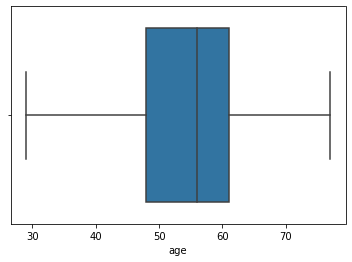

In [144]:
import seaborn as sns
sns.boxplot(data=dataset,x=dataset["age"])

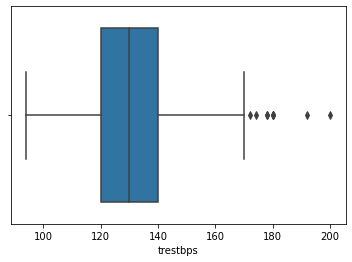

In [145]:
sns.boxplot(data=dataset,x=dataset["trestbps"])

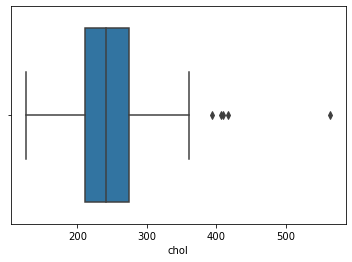

In [146]:
sns.boxplot(data=dataset,x=dataset["chol"])

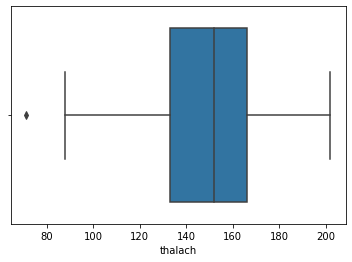

In [147]:
sns.boxplot(data=dataset,x=dataset["thalach"])

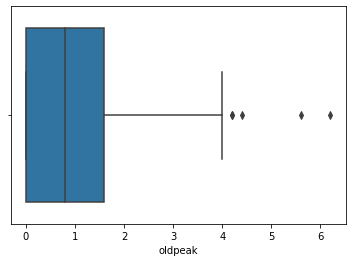

In [148]:
sns.boxplot(data=dataset,x=dataset["oldpeak"])

The boxplot for quantitative attributes which are age, trestbps, chol, thalach and oldpeak, is plotted and outliers is detected for the mentioned attributes except age, using IQR outlier detection method. The IQR outlier detection method accepts range of values from (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR), where Q1 and Q3 represents the first and third quartile respectively and IQR represents the interquartile range. 

The outliers are handled by capping them with the acceptable range of minimum and maximum value, with the Winsorization method. 

In [149]:
dataset.describe() 

,age,sex,cp,trestbps,...,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000
mean,54.475083,0.681063,0.960133,131.581395,...,1.395349,0.707641,2.315615,0.541528
std,9.013150,0.466841,1.032023,17.588752,...,0.616316,0.990408,0.613777,0.499102
min,29.000000,0.000000,0.000000,94.000000,...,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,...,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,...,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,...,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,...,2.000000,4.000000,3.000000,1.000000


In [150]:
#print min and max of acceptable range 
maxtrest = 140 + (1.5)*(140-120) 
print("Max of accpetable range of trestbps: ",maxtrest)
mintrest = 120 - (1.5)*(140-120)
print("Min of acceptable range of trestbps: ",mintrest) 
maxchol = 275 + (1.5)*(275-211) 
print("Max of accpetable range of chol: ",maxchol)
minchol = 211 - (1.5)*(275-211)
print("Min of acceptable range of chol: ",minchol) 
maxthal = 166 + (1.5)*(166-133) 
print("Max of accpetable range of thalach: ",maxthal)
minthal = 133 - (1.5)*(166-133)
print("Min of acceptable range of thalach: ",minthal) 
maxpeak = 1.6+ (1.5)*(1.6-0) 
print("Max of accpetable range of oldpeak: ",maxpeak)
minpeak = 0 - (1.5)*(1.6-0)
print("Min of acceptable range of oldpeak: ",minpeak) 

#since thalach is integer attribute  
minthal = 84 #rounded to integer 
maxthal = 216 #rounded to integer 

Max of accpetable range of trestbps:  170.0
Min of acceptable range of trestbps:  90.0
Max of accpetable range of chol:  371.0
Min of acceptable range of chol:  115.0
Max of accpetable range of thalach:  215.5
Min of acceptable range of thalach:  83.5
Max of accpetable range of oldpeak:  4.0
Min of acceptable range of oldpeak:  -2.4000000000000004


In [151]:
#cap outliers with min and max of acceptable range 
for i in range(len(dataset["trestbps"])):
    if dataset["trestbps"][i] > maxtrest:
        dataset["trestbps"][i]= maxtrest 
    if dataset["trestbps"][i] < mintrest:
        dataset["trestbps"][i]= mintrest
for i in range(len(dataset["chol"])):
    if dataset["chol"][i] > maxchol:
        dataset["chol"][i]= maxchol 
    if dataset["chol"][i] < minchol:
        dataset["chol"][i]= minchol
for i in range(len(dataset["thalach"])):
    if dataset["thalach"][i] > maxthal:
        dataset["thalach"][i]= maxthal 
    if dataset["thalach"][i] < minthal:
        dataset["thalach"][i]= minthal 
for i in range(len(dataset["oldpeak"])):
    if dataset["oldpeak"][i] > maxpeak:
        dataset["oldpeak"][i]= maxpeak 
    if dataset["oldpeak"][i] < minpeak:
        dataset["oldpeak"][i]= minpeak 
dataset.describe()

,age,sex,cp,trestbps,...,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000
mean,54.475083,0.681063,0.960133,131.235880,...,1.395349,0.707641,2.315615,0.541528
std,9.013150,0.466841,1.032023,16.628314,...,0.616316,0.990408,0.613777,0.499102
min,29.000000,0.000000,0.000000,94.000000,...,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,...,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,...,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,...,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,...,2.000000,4.000000,3.000000,1.000000


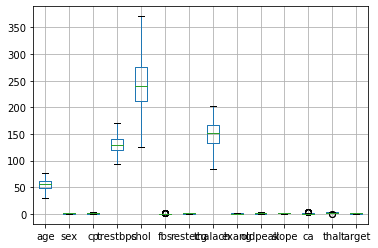

In [152]:
dataset.boxplot() 

The dataset is now free from duplicates and outliers. 


## Feature Selection (Data Reduction) 
Feature selection is done by using the filter method, as various machine learning algorithms will be applied to build various models. Filter method is chosen as wrapper method such as Reduce Feature Elimination (RFE) function in scikit-learn is limited to certain machine learning algorithms such as linear regression and decision tree. 

In filter method, only relevant features are taken. Features with absolute correlation coefficient of greater than 0.5 with the target and absolute correlation coefficient of less than 0.5 with other predictors is chosen. This is to reduce overfitting and multicollinearity, which will cause misleading prediction. 

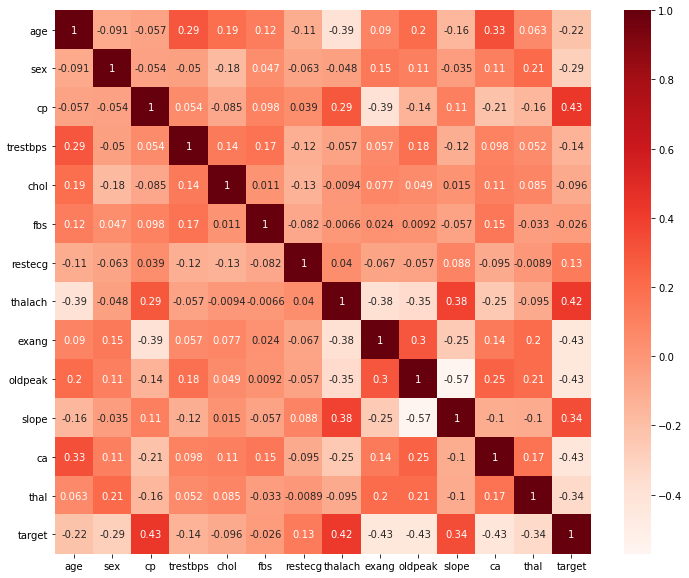

In [153]:
#correlation matrix 
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

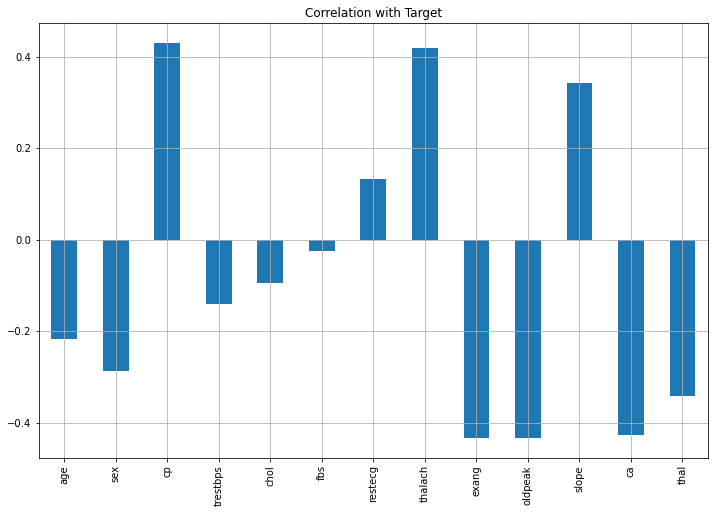

In [154]:
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind = 'bar', grid = True, 
                                                             figsize = (12, 8), 
                                                             title = "Correlation with Target")

As all attributes has a absolute correlation coefficient of less than 0.5 with 'target', thus, a bar-form correlation of features with 'target' is plotted to have better insights of the correlation. From the bar-form correlation matrix, chol and fbs has the least correlation with the target. However, all predictors or independent variable has a absolute correlation coefficient of less than 0.5 with each other and also with 'target', thus, no attributes are removed from the dataset. 

## Dummy Variables (Data Transformation) 
Data transformation is done by converting categorical attributes to dummy variables for the ease of model construction, using the`.get_dummies()` syntax. Dummy variables uses 0 or 1 to indicate absence or presence of the categorical value, sorting them to mutually exclusive categories. Since dummy varialbes is created, hence, there is no need to perform concept hierarchy or relevelling to reduce the factor levels of the attributes. 

In [155]:
#categorical variables to convert to dummy variables 
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        print(f"{column} : {dataset[column].unique()}")

sex : [1 0]
cp : [3 2 1 0]
fbs : [1 0]
restecg : [0 1 2]
exang : [0 1]
slope : [0 2 1]
ca : [0 2 1 3 4]
thal : [1 2 3 0]
target : [1 0]


In [156]:
#convert to dummy variables 
from pandas import get_dummies

a = pd.get_dummies(dataset['sex'], prefix = "sex")
b = pd.get_dummies(dataset['cp'], prefix = "cp")
c = pd.get_dummies(dataset['fbs'], prefix = "fbs")
d = pd.get_dummies(dataset['restecg'], prefix = "restecg")
e = pd.get_dummies(dataset['exang'], prefix = "exang")
f = pd.get_dummies(dataset['slope'], prefix = "slope")
g = pd.get_dummies(dataset['ca'], prefix = "ca")
h = pd.get_dummies(dataset['thal'], prefix = "thal")

#data frame with dummy variables 
frames = [dataset, a, b, c, d, e, f, g, h]

#combine dummy variables with dataset 
dataset2 = pd.concat(frames, axis = 1)

#drop categorical variabes as they are converted to dummy variables
dataset2 = dataset2.drop(columns = ['sex','cp', 'fbs', 'restecg',
                                  'exang','slope','ca','thal'])

dataset2.head()

,age,trestbps,chol,thalach,...,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,...,0,1,0,0
1,37,130,250,187,...,0,0,1,0
2,41,130,204,172,...,0,0,1,0
3,56,120,236,178,...,0,0,1,0
4,57,120,354,163,...,0,0,1,0


## Exploratory Data Analysis (EDA) 
Exploratory Data Analysis (EDA) analyses the dataset, gives insight about dataset with visuals, to discover patterns and abnormalies. 

Part of the EDA has already performed in data preprocessing for outlier detection using Quartile method with boxplot, and for data reduction using correlation matrix plot. 

EDA process involves exploring the dimension of dataset, central tendency and dispersion of dataset, summary statistics and others, which will be demonstrated below. 

## Dimension and Variables or Attributes of Dataset 

In [157]:
type(dataset)

pandas.core.frame.DataFrame

In [158]:
dataset.shape

(301, 14)

The dataset is a dataframe with dimension consists of 31 features including the dummy variables, and 301 instances, as shown using the `.shape` syntax.

In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.0 KB


In [160]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        301 non-null    int64  
 1   trestbps   301 non-null    int64  
 2   chol       301 non-null    int64  
 3   thalach    301 non-null    int64  
 4   oldpeak    301 non-null    float64
 5   target     301 non-null    int64  
 6   sex_0      301 non-null    uint8  
 7   sex_1      301 non-null    uint8  
 8   cp_0       301 non-null    uint8  
 9   cp_1       301 non-null    uint8  
 10  cp_2       301 non-null    uint8  
 11  cp_3       301 non-null    uint8  
 12  fbs_0      301 non-null    uint8  
 13  fbs_1      301 non-null    uint8  
 14  restecg_0  301 non-null    uint8  
 15  restecg_1  301 non-null    uint8  
 16  restecg_2  301 non-null    uint8  
 17  exang_0    301 non-null    uint8  
 18  exang_1    301 non-null    uint8  
 19  slope_0    301 non-null    uint8  
 20  slope_1   

The dataset originally consists of 14 attributes where 5 of them are quantitative attributes including integers and float, and 9 of them are qualitative categorical attributes which were encoded to integers in the raw dataset. These categorical attributes are then transformed to dummy variables in data transformation, resulting in 31 columns in total. 

## Frequency Distribution Table 
Frequency Distribution Table for Categorical Variables are shown below, which measures if the dataset is biased or having imbalance class or not. 

In [161]:
pd.crosstab(index=dataset['sex'], columns='count') 

col_0,count
sex,
0,96
1,205


In [162]:
pd.crosstab(index=dataset['cp'], columns='count') 

col_0,count
cp,
0,143
1,50
2,85
3,23


In [163]:
pd.crosstab(index=dataset['fbs'], columns='count') 

col_0,count
fbs,
0,256
1,45


In [164]:
pd.crosstab(index=dataset['restecg'], columns='count') 

col_0,count
restecg,
0,147
1,150
2,4


In [165]:
pd.crosstab(index=dataset['exang'], columns='count') 

col_0,count
exang,
0,202
1,99


In [166]:
pd.crosstab(index=dataset['slope'], columns='count') 

col_0,count
slope,
0,21
1,140
2,140


In [167]:
pd.crosstab(index=dataset['ca'], columns='count') 

col_0,count
ca,
0,175
1,65
2,38
3,20
4,3


In [168]:
pd.crosstab(index=dataset['thal'], columns='count') 

col_0,count
thal,
0,2
1,18
2,164
3,117


In [169]:
pd.crosstab(index=dataset['target'], columns='count') 

col_0,count
target,
0,138
1,163


In [170]:
dataset['target'].value_counts()

1    163
0    138
Name: target, dtype: int64

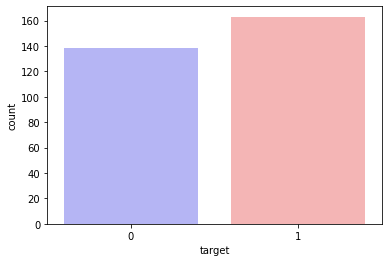

In [171]:
sns.countplot(x="target", data=dataset, palette="bwr")
plt.show()

As shown in the plot, the distribution of 'heart disease' and 'no heart disease' is considered evenly distribute as there are no big difference in count. Hence, this dataset will produce a good model as it is not biased.  

## Measure of Central Tendency and Dispersion 

In [172]:
dataset.describe() 

,age,sex,cp,trestbps,...,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000
mean,54.475083,0.681063,0.960133,131.235880,...,1.395349,0.707641,2.315615,0.541528
std,9.013150,0.466841,1.032023,16.628314,...,0.616316,0.990408,0.613777,0.499102
min,29.000000,0.000000,0.000000,94.000000,...,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,...,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,...,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,...,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,...,2.000000,4.000000,3.000000,1.000000


In [456]:
dataset.mode()

,age,sex,cp,trestbps,...,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,...,1.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN


Measures of central tendency of the dataset measures the center or middle of the dataset, which can be measured using the mean, median and mode (CK-12,2020). 

As shown in `.describe()` and `.mode()`, the mean, median (2nd Quartile or 50%) and mode for the quantitative attributes are approximately the same, thus they are approximately normal. This can be seen from the boxplot plotted in data cleaning too, as the boxes are approximately evenly separated. 

Text(0, 0.5, 'Target')

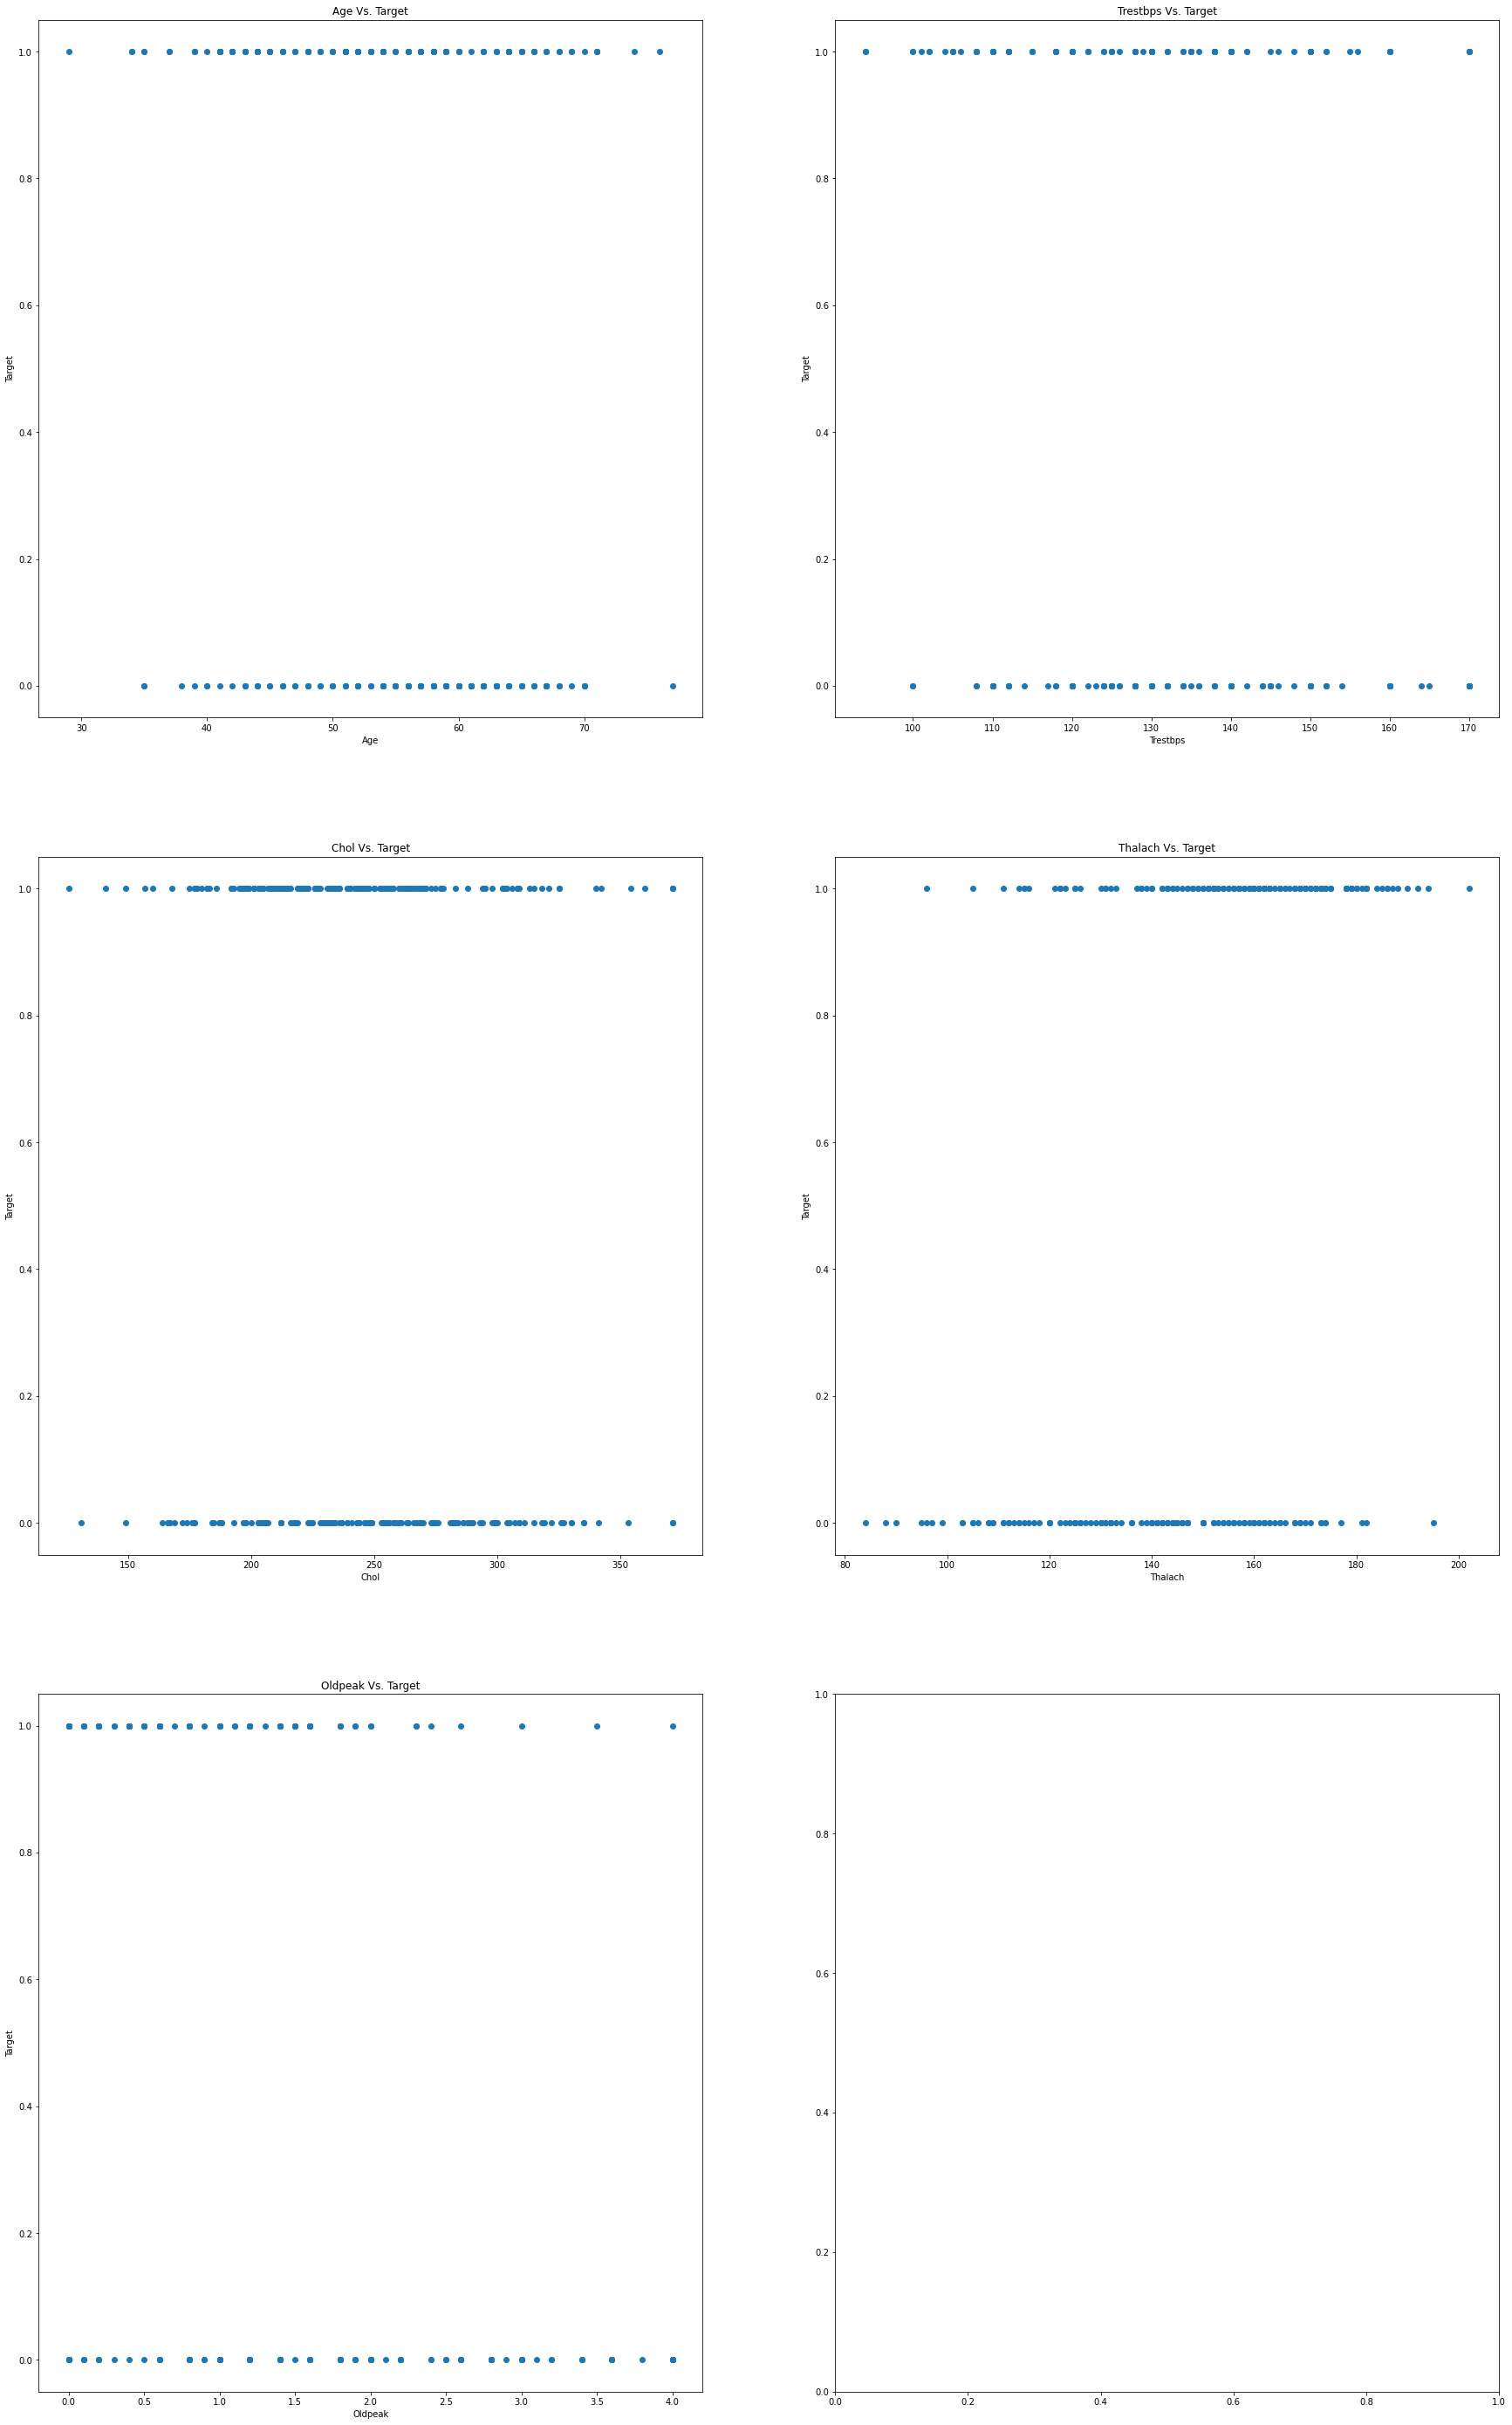

In [174]:
fig, axes = plt.subplots(3, 2, figsize=(30,50))

#scatter plot of radius and compactness
axes[0,0].scatter(dataset['age'], dataset['target'])
axes[0,0].set_title("Age Vs. Target")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Target")

#scatter plot of radius and texture
axes[0,1].scatter(dataset['trestbps'], dataset['target'])
axes[0,1].set_title("Trestbps Vs. Target")
axes[0,1].set_xlabel("Trestbps")
axes[0,1].set_ylabel("Target")

#scatter plot of radius and smoothness
axes[1,0].scatter(dataset['chol'], dataset['target'])
axes[1,0].set_title("Chol Vs. Target")
axes[1,0].set_xlabel("Chol")
axes[1,0].set_ylabel("Target")

#scatter plot of radius and concavity 
axes[1,1].scatter(dataset['thalach'], dataset['target']);
axes[1,1].set_title("Thalach Vs. Target");
axes[1,1].set_xlabel("Thalach")
axes[1,1].set_ylabel("Target")

axes[2,0].scatter(dataset['oldpeak'], dataset['target']);
axes[2,0].set_title("Oldpeak Vs. Target");
axes[2,0].set_xlabel("Oldpeak")
axes[2,0].set_ylabel("Target")

(0.0, 4.0)

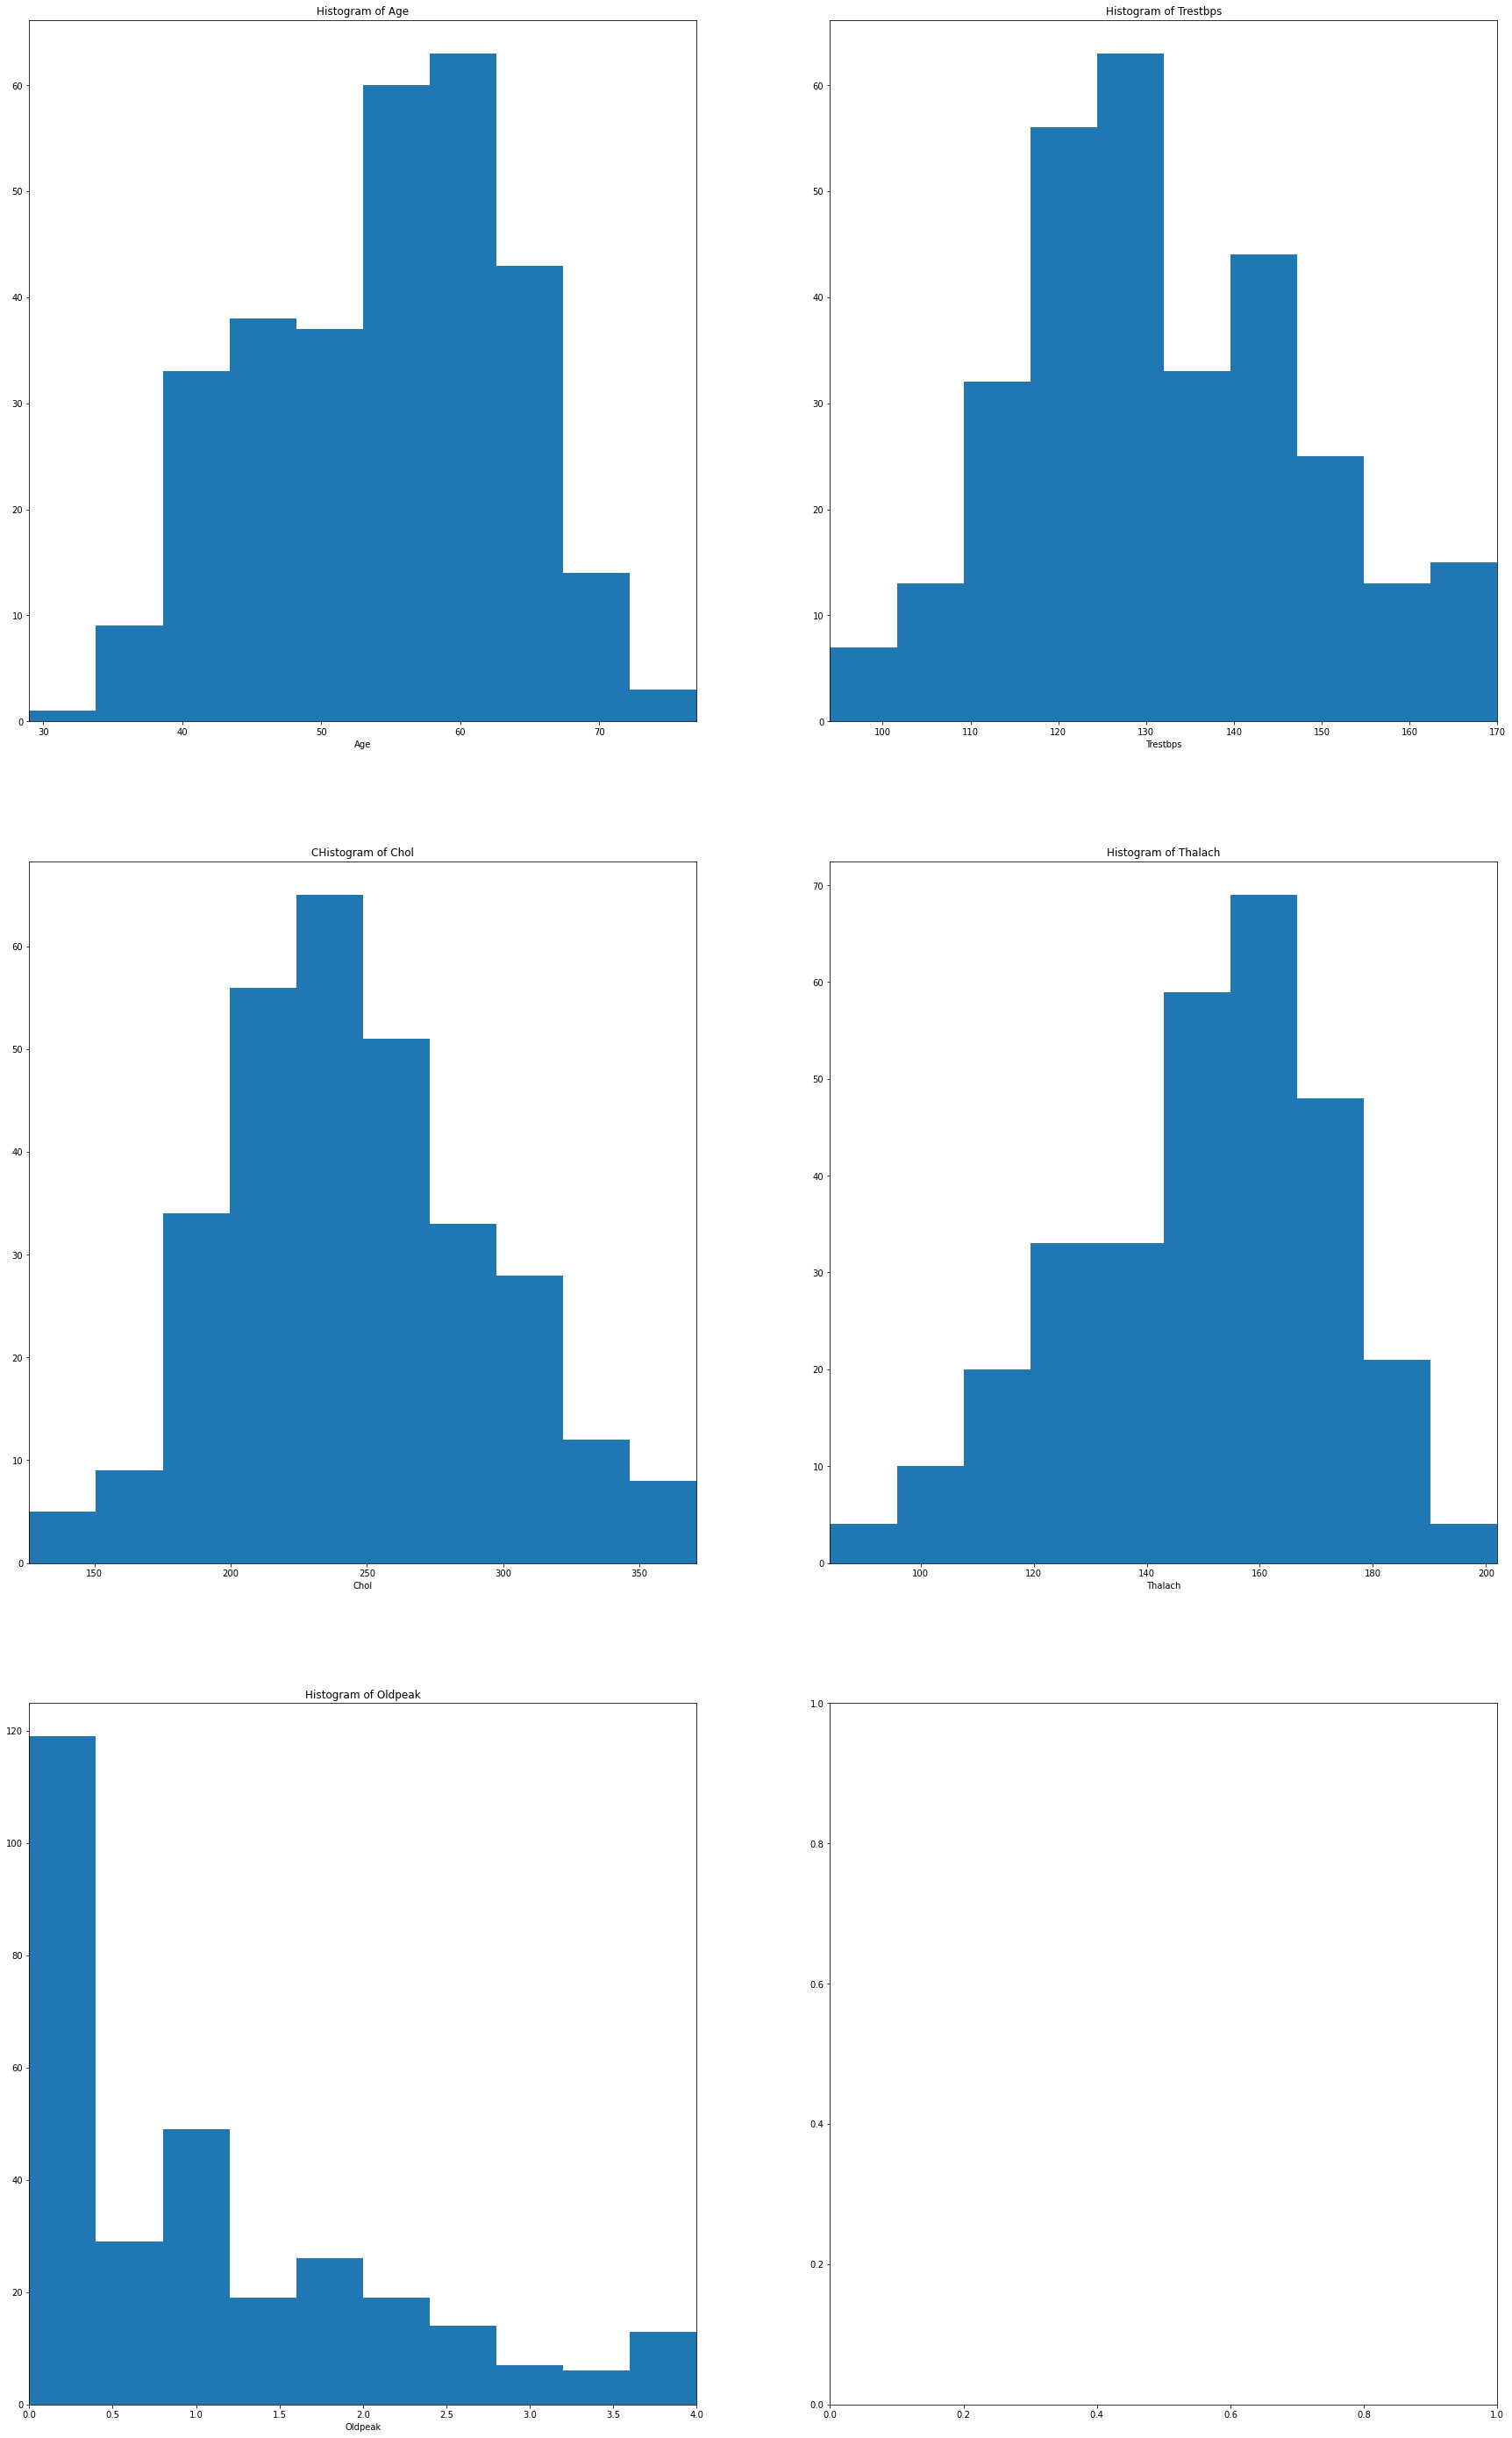

In [175]:
fig, axes = plt.subplots(3, 2, figsize=(30,50))

#scatter plot of radius and compactness
axes[0,0].hist(dataset['age'])
axes[0,0].set_title("Histogram of Age")
axes[0,0].set_xlabel("Age")
axes[0,0].set_xlim((min(dataset.age), max(dataset.age)))

#scatter plot of radius and texture
axes[0,1].hist(dataset['trestbps'])
axes[0,1].set_title("Histogram of Trestbps")
axes[0,1].set_xlabel("Trestbps")
axes[0,1].set_xlim((min(dataset.trestbps), max(dataset.trestbps)))

#scatter plot of radius and smoothness
axes[1,0].hist(dataset['chol'])
axes[1,0].set_title("CHistogram of Chol")
axes[1,0].set_xlabel("Chol")
axes[1,0].set_xlim((min(dataset.chol), max(dataset.chol)))

#scatter plot of radius and concavity 
axes[1,1].hist(dataset['thalach']);
axes[1,1].set_title("Histogram of Thalach");
axes[1,1].set_xlabel("Thalach")
axes[1,1].set_xlim((min(dataset.thalach), max(dataset.thalach)))

axes[2,0].hist(dataset['oldpeak']);
axes[2,0].set_title("Histogram of Oldpeak");
axes[2,0].set_xlabel("Oldpeak")
axes[2,0].set_xlim((min(dataset.oldpeak), max(dataset.oldpeak)))

In [176]:
cv = dataset.std()/dataset.mean()
cv

age         0.165455
sex         0.685459
cp          1.074875
trestbps    0.126706
chol        0.193057
fbs         2.389111
restecg     1.002427
thalach     0.152238
exang       1.430806
oldpeak     1.077021
slope       0.441693
ca          1.399591
thal        0.265060
target      0.921655
dtype: float64

Measures of dispersion of the dataset measures how disprese or spread out the data in the dataset are. It can be measured using range, standard deviation and variance, and also coefficient of variation (Kaufmann, 2014). 

The histogram and scatter plot for quantitative variales is also able to show the dispersion and central tendancy of the data points. As shown in the histograms and scatter plots, all the attributes are considered less disperse.

The Coefficient of Variation (CV) is calculated by dividing standard deviation by mean. A CV value of lesser than 1 indicates a low variance. However, oldpeak has CV value of 1.077, thus it is considered as high variance, thus oldpeak is spread out (Kaufmann, 2014). 

## Skewness of Dataset 
Skewness measures a dataset’s symmetry – or lack of symmetry.   A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0 (McNeese, 2016). 

In [177]:
dataset.skew()

age        -0.204794
sex        -0.780884
cp          0.501383
trestbps    0.393401
chol        0.338325
fbs         1.975736
restecg     0.176460
thalach    -0.485568
exang       0.732009
oldpeak     0.989906
slope      -0.498159
ca          1.276698
thal       -0.485767
target     -0.167525
dtype: float64

Accoding to rule of thumb, skewness of -0.5 to 0.5 is fairly symmetrical. Skewness with absolute value of 0.5 to 1 is moderately skewed, and highly skewed if more than 1. The mathematical symbol in skewness value indicates whether the variables is postiviely or negatively skewed. 

age, sex, thalach, slope, thal and target is negatively skewed, and other attributes are positively skewed. 

From `.skew()`, fbs and ca are highly skewed. sex, cp, exang, oldpeak are moderately skewed. 

## Correlation Matrix 
Correlation Matrix heatmap is shown in Feature Selection or Data Reduction in Data Preprocessing. 

In [454]:
#correlation matrix
dataset.corr()

,age,sex,cp,trestbps,...,slope,ca,thal,target
age,1.000000,-0.091413,-0.057444,0.294365,...,-0.159338,0.329651,0.062585,-0.217435
sex,-0.091413,1.000000,-0.054154,-0.049534,...,-0.035295,0.107661,0.212876,-0.286312
cp,-0.057444,-0.054154,1.000000,0.053772,...,0.113954,-0.210373,-0.158989,0.430339
trestbps,0.294365,-0.049534,0.053772,1.000000,...,-0.116790,0.097711,0.051796,-0.141559
chol,0.191776,-0.176079,-0.085112,0.137959,...,0.015292,0.113965,0.084864,-0.095811
fbs,0.117647,0.047021,0.097609,0.169711,...,-0.057400,0.152237,-0.033491,-0.025594
restecg,-0.106877,-0.062528,0.038665,-0.119345,...,0.087726,-0.094710,-0.008949,0.132491
thalach,-0.391592,-0.047879,0.290914,-0.056620,...,0.383774,-0.247034,-0.094903,0.418591
exang,0.089563,0.145274,-0.391579,0.057356,...,-0.254445,0.135480,0.204889,-0.434432
oldpeak,0.204963,0.109920,-0.139662,0.183717,...,-0.571287,0.247115,0.206022,-0.433498


As shown in the correlation matrix, all attributes has absolute correlation of less than 0.5 with each other, hence, there will be no multicollinearity. 

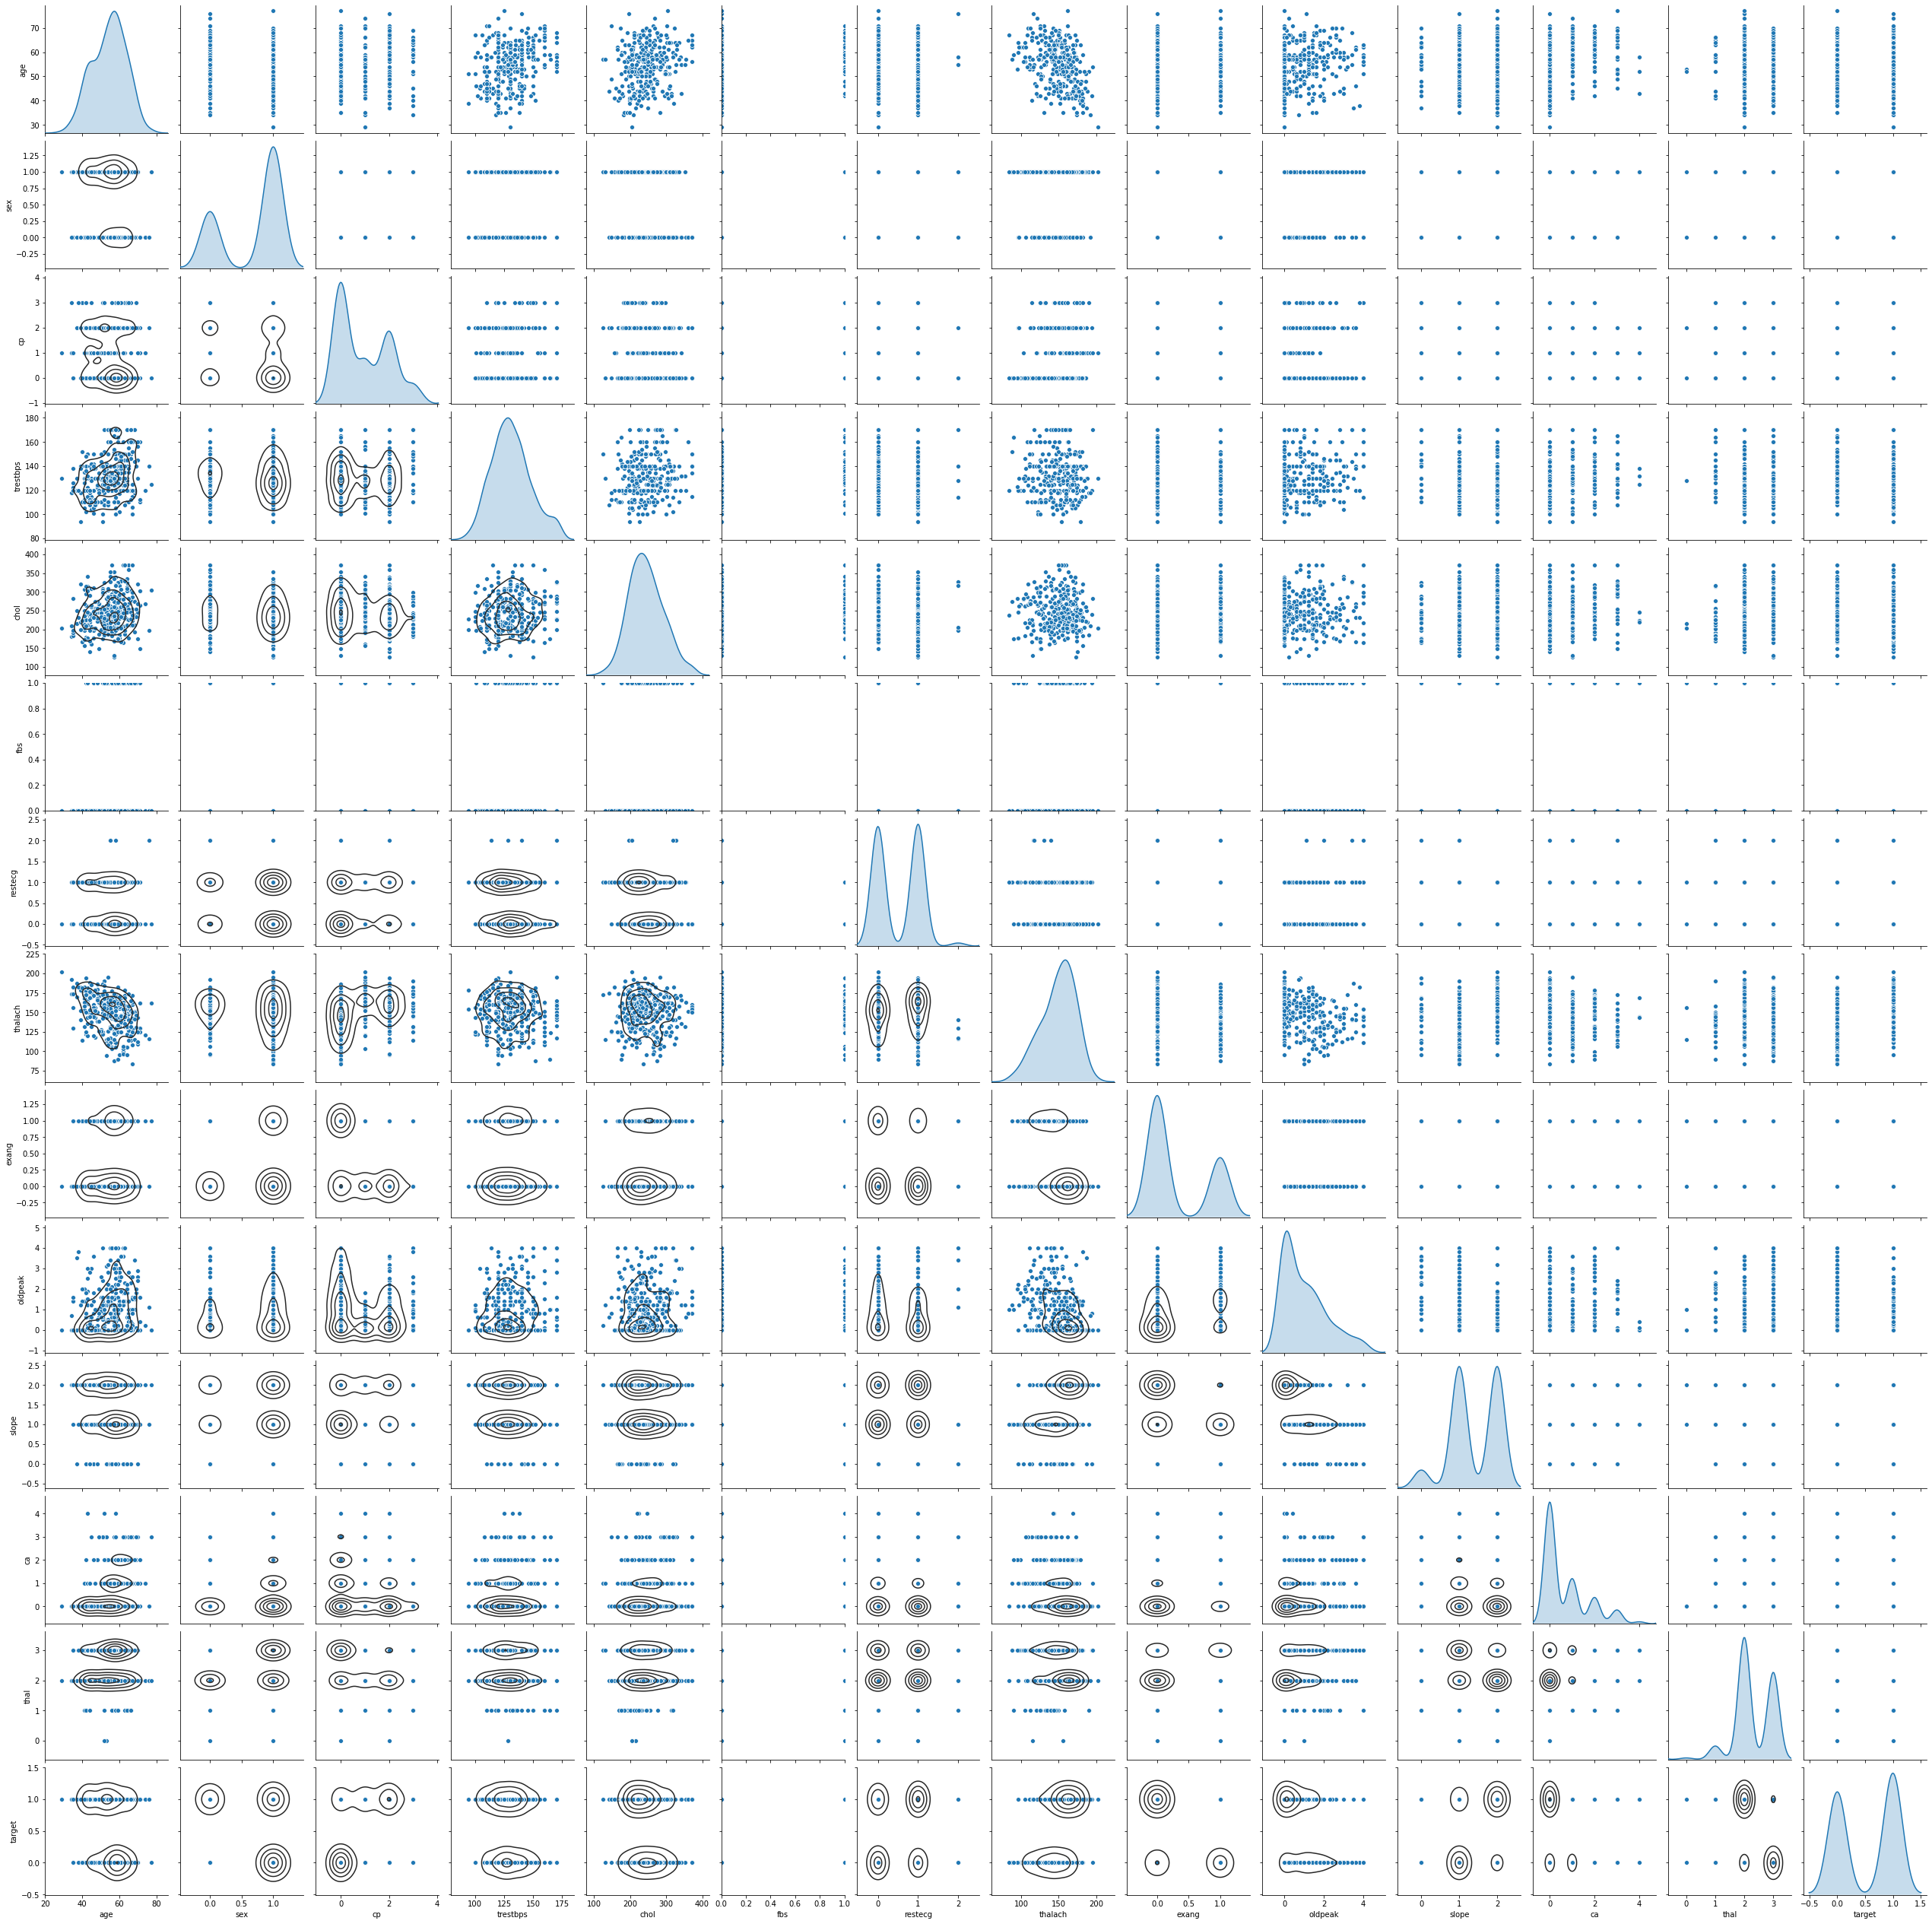

In [179]:
g = sns.pairplot(dataset, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Scatter plot matrix is a matrix of scatter plots where each scatter plot in the grid is created between different combinations of variables. In other words, scatter plot matrix represents bi-variate or pairwise relationship between different combinations of variables in grid form (Kumar, 2020). Diagonally from top left to right, the plots represent univariate distribution of data for the variable in that column, for instance, distribution of age, distribution of sex, and others. Scatter plot matrix is useful in investigating the feature correlation and multicollinearity. 

The above scatter density plot matrix is associated with Kernel Density Estimation (KDE) plots, which estimates the probability density of a variable and also the probability distribution (JournalDev, n.d.). The higher density of KDE plots implies the high probability of occurence. 

From the scatter density plot matrix, all variables are moderately related to target. However, all the scatter plot are dispersed with correlation of absolute value less than 0.5, hence, no multicollinearity. 

## Visualization of Attributes 
Attributes are visualized to discover general patterns in the attributes, and have a rough conclusion about the attributes. 

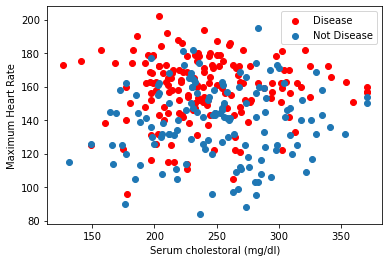

In [180]:
plt.scatter(x=dataset.chol[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.chol[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Serum cholestoral (mg/dl)")
plt.ylabel("Maximum Heart Rate")
plt.show()

From the scatter plot, a higher heart rate implies a higher chance of having heart disease.

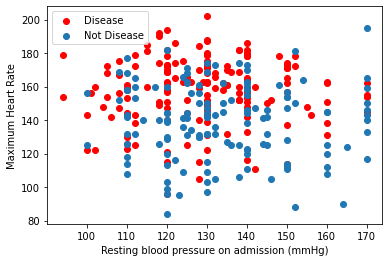

In [181]:
plt.scatter(x=dataset.trestbps[(dataset.target==1)], y=dataset.thalach[dataset.target==1], c="red")
plt.scatter(x=dataset.trestbps[(dataset.target==0)], y=dataset.thalach[dataset.target==0])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Resting blood pressure on admission (mmHg)")
plt.ylabel("Maximum Heart Rate")
plt.show()

From the scatter plot, person with high heart rate and low blood pressure will have higher chance to suffer from heart disease. 

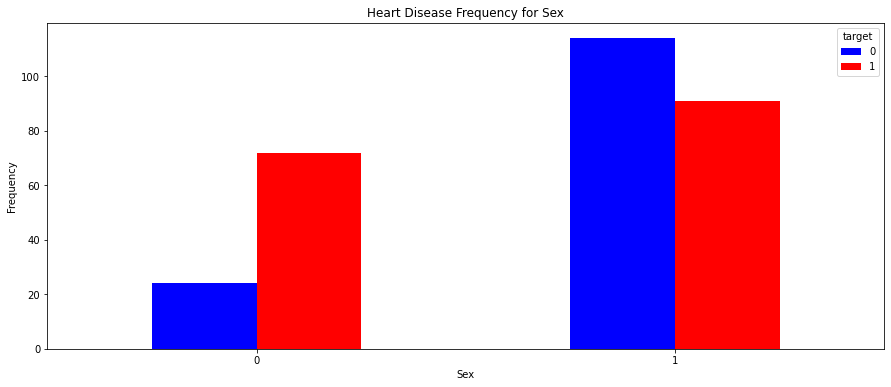

In [182]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=["blue","red"])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

From the bar chart, female tends to have higher risk to suffer from heart disease. 

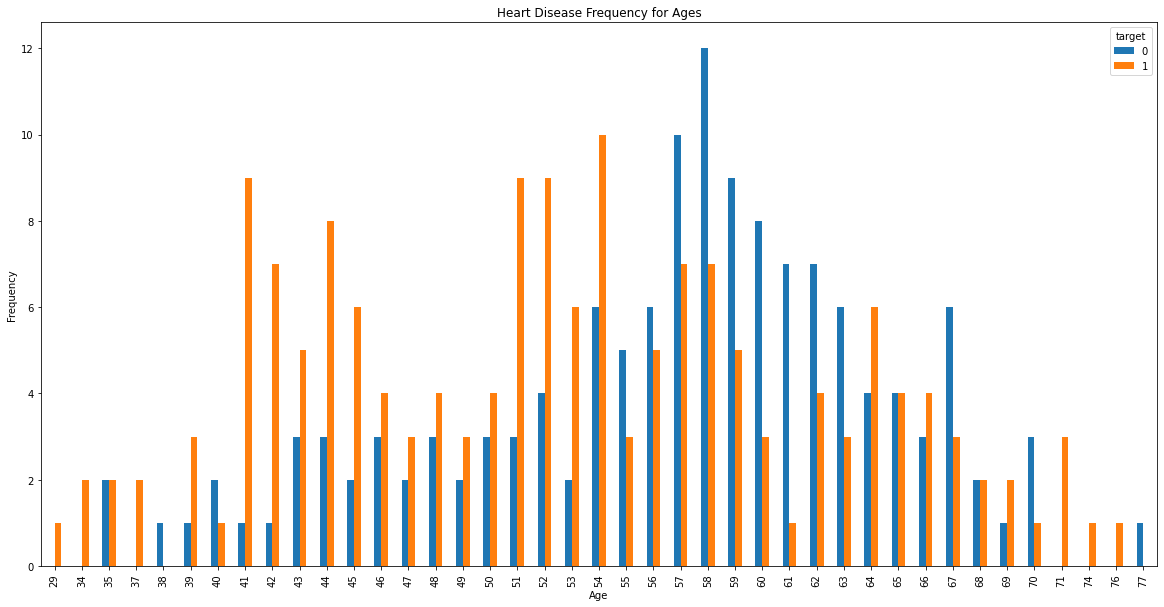

In [455]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the bar chart of Age versus frequency, age of 41 to 45 and 51 to 54 are having a high amount of heart disease, impling that they are highly risked people to have heart disease. 

However, the above conclusions are induced from the basic visualization of the attributes. It may not be true since it is comparing in a univariate or bivariate way. A precise conclusion or rules should be extracted from the classification model. 

## Realibility - Fitting Probability Distribution 

Probability distribution is fitted to the quantitative variables, to select the best probability model. Statistical approaches to estimating how well a given model fits a dataset and how complex the model is, calculating using the Akaike Information Criterion (AIC) which is derived from frequentist probability and Bayesian Information Criterion (BIC) which is derived from Bayesian probability. AIC and BIC are both calculated using the maximum likelihood, which maximizes the conditional probability of observing the data (X) given a specific probability distribution and its parameters (theta) (Brownlee, 2019). 

AIC and BIC works in a similar way but they focus on different situation. AIC attempt to select an unknown model which has high dimensional reality whereas BIC finds only True models. In layman terms, AIC indicates the overfitting issues and BIC indicates the underfitting issues, as they both penalize free parameters (Ash3323 and Taylor, 2018).

Thus, in this assessment, AIC and BIC are both taken into consideration in choosing the best probability distribution model. The lower score of AIC and BIC indicates a better probability distribution model. 

                  Alpha     Beta    Gamma       Mu     Sigma     Lambda         AICc          BIC
Distribution                                                                                     
Weibull_2P      58.2492  6.94411                                         2177.885537  2185.259489
Weibull_3P      38.0775  4.42833  19.8001                                2176.319505  2187.360027
Normal_2P                                  54.4751   8.99817             2180.847759  2188.221711
Gamma_2P        1.56931  34.7128                                         2191.380616  2198.754569
Gamma_3P        1.56931  34.7128        0                                2193.421156  2204.461679
Lognormal_2P                               3.98327  0.173114             2200.379602  2207.753554
Lognormal_3P                       2.8622  3.92755  0.183576             2204.203963  2207.753554
Exponential_2P                     28.999                     0.0392525  2555.159804  2562.533756
Exponential_1P      

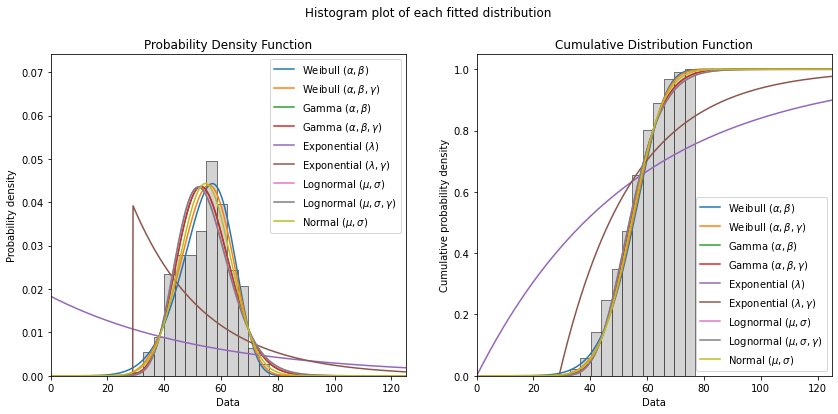

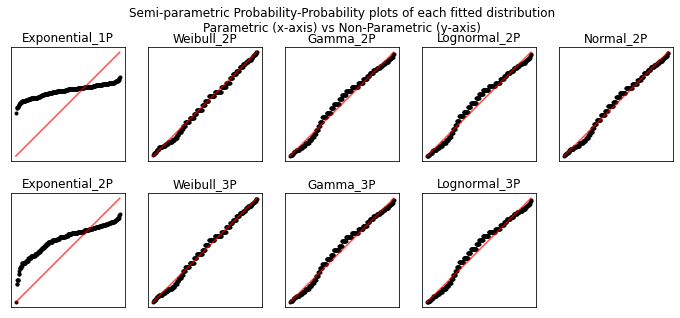

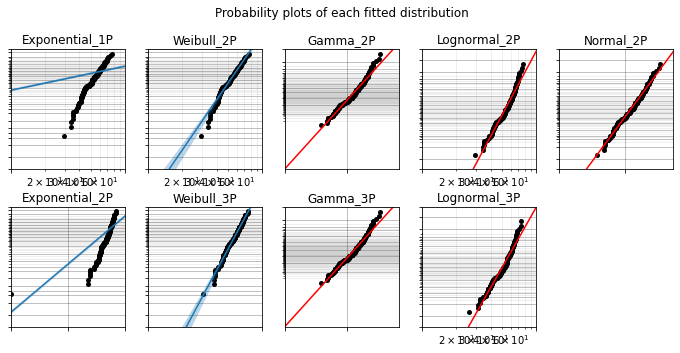

In [184]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['age']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

                  Alpha     Beta    Gamma       Mu     Sigma      Lambda         AICc          BIC
Distribution                                                                                      
Lognormal_2P                               4.86909  0.125581              2540.399424  2547.773376
Lognormal_3P                      28.4305   4.6199  0.160991              2541.963036  2547.773376
Gamma_2P        2.06999  63.3992                                          2542.030163  2549.404116
Gamma_3P        4.05568  16.8708  62.8132                                 2541.558121  2552.598644
Weibull_3P      45.6081   2.6124  90.7129                                 2541.694138  2552.734661
Normal_2P                                  131.236   16.6007              2549.525974  2556.899926
Weibull_2P      138.711  8.09402                                          2586.829721  2594.203673
Exponential_2P                     93.999                      0.0268551  2783.654675  2791.028627
Exponentia

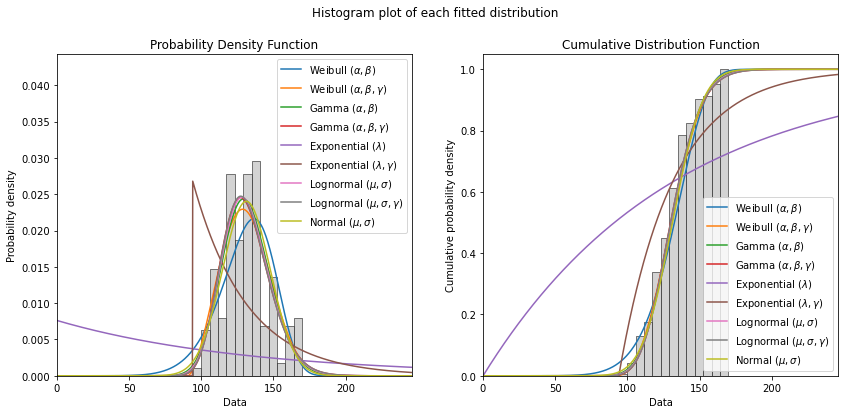

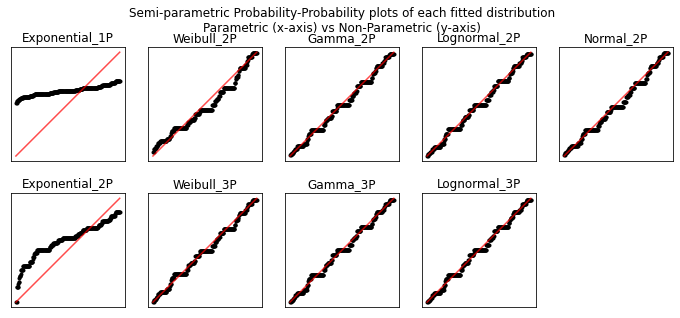

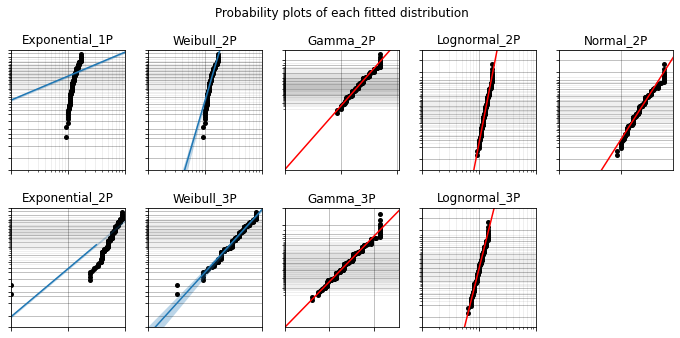

In [185]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['trestbps']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

                  Alpha     Beta    Gamma       Mu     Sigma      Lambda         AICc          BIC
Distribution                                                                                      
Gamma_2P        9.15759  26.8216                                          3173.920023  3181.293976
Lognormal_2P                               5.48503  0.195045              3176.246058  3183.620010
Lognormal_3P                      4.11084  5.46749  0.198576              3178.526807  3183.620010
Gamma_3P        9.15759  26.8216        0                                 3175.960563  3187.001086
Normal_2P                                  245.621     47.34              3180.368923  3187.742875
Weibull_3P      146.172  2.96593  115.062                                 3179.513751  3190.554274
Weibull_2P      265.321  5.47034                                          3200.862396  3208.236348
Exponential_2P                    125.999                     0.00835965  3486.212325  3493.586278
Exponentia

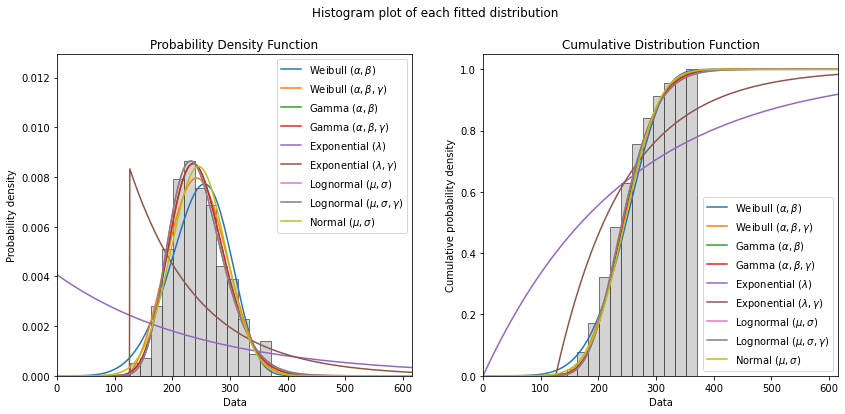

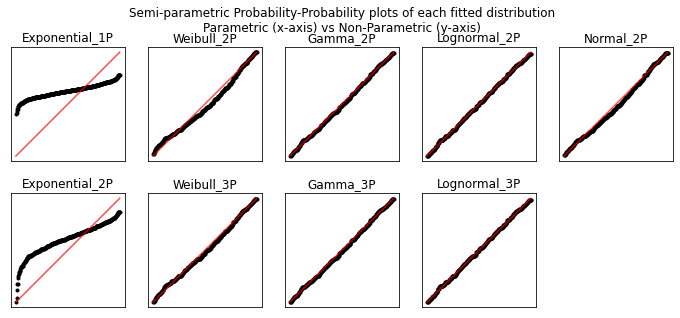

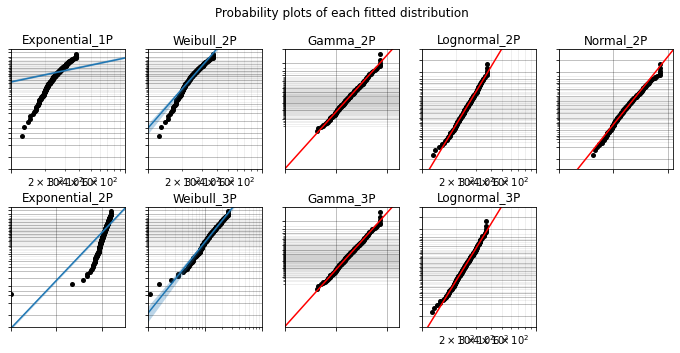

In [186]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['chol']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

                  Alpha     Beta    Gamma       Mu     Sigma     Lambda         AICc          BIC
Distribution                                                                                     
Weibull_2P      159.016  7.89615                                         2720.985513  2728.359465
Weibull_3P      159.016  7.89615        0                                2723.026056  2734.066578
Normal_2P                                  149.535   22.7271             2738.623287  2745.997239
Gamma_2P        3.74201  39.9611                                         2757.660878  2765.034830
Gamma_3P        3.74201  39.9611        0                                2759.701418  2770.741941
Lognormal_2P                               4.99497  0.162305             2770.608897  2777.982849
Lognormal_3P                      3.76619  4.96876   0.16694             2773.819741  2777.982849
Exponential_2P                     83.999                     0.0152588  3123.964166  3131.338118
Exponential_1P      

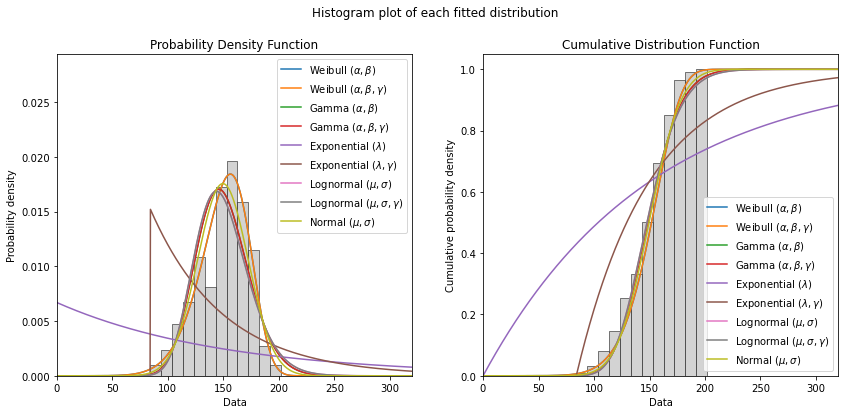

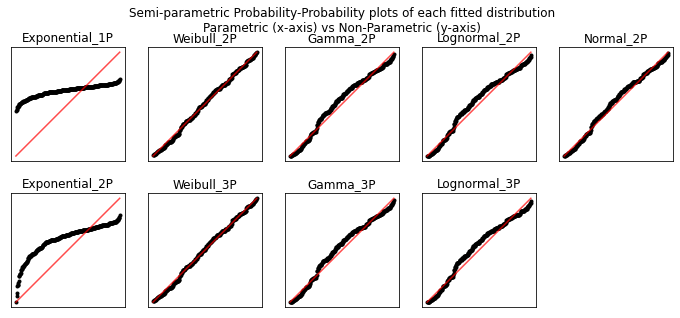

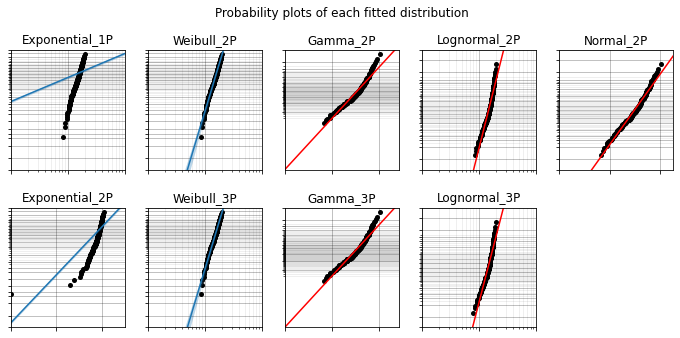

In [187]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['thalach']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

                   Alpha      Beta      Gamma       Mu     Sigma    Lambda        AICc         BIC
Distribution                                                                                      
Weibull_2P       1.67858   1.46622                                          543.960311  550.536850
Weibull_3P       1.58495   1.34868  0.0612493                               544.300973  554.135333
Gamma_2P        0.851258   1.78744                                          548.617623  555.194162
Exponential_2P                          0.099                     0.702954  555.865067  562.441605
Gamma_3P         1.47858  0.961509     0.0999                               557.460824  567.295184
Exponential_1P                                                    0.657216  581.274454  584.572772
Lognormal_2P                                   0.11465  0.887485            581.063579  587.640117
Lognormal_3P                                0  0.11465  0.887485            583.123877  587.640117
Normal_2P 

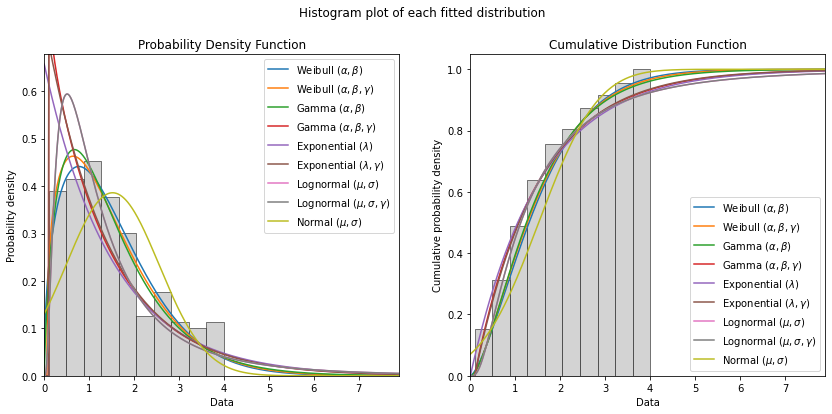

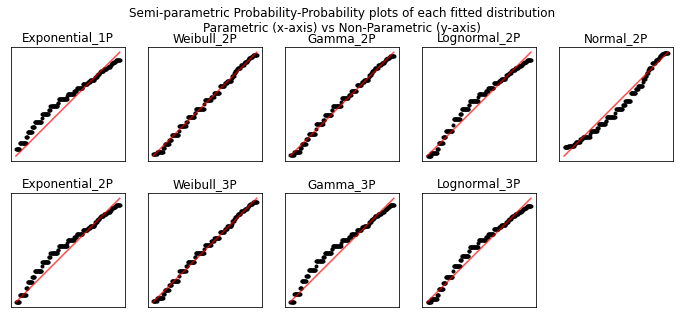

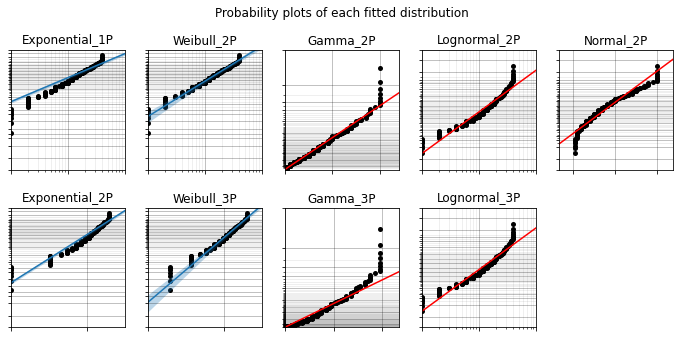

In [188]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['oldpeak']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

Weibull 2P best fits for the all quantitative attributes, as Weibull 2P has low AIC and BIC compared to other distribution fitted for the quantitative attributes. 

The Weibull distribution is widely used in reliability and life data analysis due to its versatility. Life data analysis refers to data analysis involving prediction of lifetime. The Weibull 2p or 2 parameters distribution consists parameters of shape and scale, where Weibull 3p or 3 parameters distribution consists paramters of shape, scale and location (Weibull, n.d.). Weibull distribution is commonly used assess product reliability, analyze life data and model failure times, from biology industry to economic industry (Stephanie, 2017). 

# Model Development 
`dataset2` is used for model development which consists of dummy variables created from categorical variables, as shown in Data Preprocessing while doing Data Transformation.

Decision Tree Classifier, Naive Bayes Classifier and K-Nearest Neighbours will be modelled and evaluated, to choose the best model with high performance metrics. 


In [189]:
dataset2.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#split dataset to train and test 
feature = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],

#split train and test for decision tree model 80/20 split
y = dataset2["target"]
x = dataset2.drop(["target"],axis=1).values
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=0)

xtrainknn = scaler.fit_transform(xtrain)
xtestknn = scaler.transform(xtest)


In [358]:
xtrainknn

array([[0.29166667, 0.36842105, 0.34166667, ..., 0.        , 1.        ,
        0.        ],
       [0.625     , 1.        , 0.49166667, ..., 0.        , 1.        ,
        0.        ],
       [0.60416667, 0.60526316, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.5625    , 0.34210526, 0.25833333, ..., 0.        , 0.        ,
        1.        ],
       [0.375     , 0.57894737, 0.525     , ..., 0.        , 1.        ,
        0.        ],
       [0.64583333, 0.47368421, 0.3125    , ..., 0.        , 0.        ,
        1.        ]])

In [359]:
xtestknn

array([[0.85416667, 0.67105263, 0.17916667, ..., 0.        , 0.        ,
        1.        ],
       [0.77083333, 0.86842105, 0.40416667, ..., 1.        , 0.        ,
        0.        ],
       [0.625     , 1.        , 0.65416667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.625     , 0.73684211, 0.3375    , ..., 0.        , 1.        ,
        0.        ],
       [0.83333333, 0.86842105, 0.42916667, ..., 0.        , 1.        ,
        0.        ],
       [0.47916667, 0.57894737, 0.38333333, ..., 0.        , 1.        ,
        0.        ]])

In [360]:
xtrain 

array([[ 43., 122., 213., ...,   0.,   1.,   0.],
       [ 59., 170., 249., ...,   0.,   1.,   0.],
       [ 58., 140., 211., ...,   0.,   1.,   0.],
       ...,
       [ 56., 120., 193., ...,   0.,   0.,   1.],
       [ 47., 138., 257., ...,   0.,   1.,   0.],
       [ 60., 130., 206., ...,   0.,   0.,   1.]])

In [361]:
xtest 

array([[ 70., 145., 174., ...,   0.,   0.,   1.],
       [ 66., 160., 228., ...,   1.,   0.,   0.],
       [ 59., 170., 288., ...,   0.,   0.,   1.],
       ...,
       [ 59., 150., 212., ...,   0.,   1.,   0.],
       [ 69., 160., 234., ...,   0.,   1.,   0.],
       [ 52., 138., 223., ...,   0.,   1.,   0.]])

## K-Nearest Neighbours (KNN) Modelling 
K-Nearest Neighbours (KNN) is a supervised learning algorithm which is also a classification algorithm. It considers K number of neighbours nearest the unknown and newly added point, which classifies the unknown point based on the neighbours' votes, for instance, if 5 out of 6 neighbours has a target of presence of heart disease, then the newly added unknown point will be classified as presence of heart disease. The distance of the newly added point with the neighbours can be calculated using Euclidean distance formula, and the distance is then sorted to find the nearest neighbours.

Since K-Nearest is dependent on the major votes of the neighbours, it is easily affected by attributes with large range as these attributes tends to dominate the other attributes which in turn affects the model performance. Hence, normalization is done to have a good KNN model performance. Normalization is done after Train and Test dataset split using the MinMaxScaler() (Kedarps, 2017). 

In [362]:
#suggested number of neighbours 
import math  
math.sqrt(301)

17.349351572897472

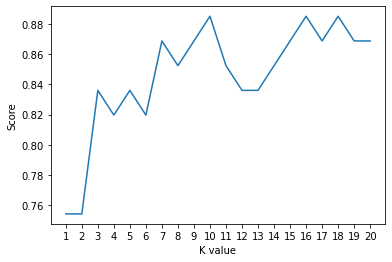

Maximum KNN Score is 88.52%
K Value with highest score:  10


In [364]:
#to determine optimum number of neighbours
scoreList = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(xtrainknn, ytrain)
    scoreList.append(knn2.score(xtestknn, ytest))
    
plt.plot(range(1,21), scoreList)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("K Value with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

According to research, there are no optimal K number of neighbours which suits all kind of dataset, as each dataset has different requirements. It is suggested to have `sqrt(number of instances)` of neighbours, however, this is just as a guideline to decided the number of neighbours (Navlani, 2018). 

Hence, to determine the optimal K number of neighbours for this case study, the model performance scorse is calculated and assessed for K of 1 to 20 using looping. From the plot shown above, the optimal K value is 10 with a model performance score of 88.52%. Thus, K value for this case study is set to 10. Whenver a new unknown record is added, it will be classified based on its 10 nearest neighbours' votes. 

In [365]:
#modeling KNN 
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(xtrainknn, ytrain)

KNeighborsClassifier(n_neighbors=10)

## Decision Tree Classification 
Decision Tree Classification is a supervised machine learning algorithm, which has a tree like structure, consisting of nodes, leaves, and branches. Data are partitioned recursively from the root node to leaf node. As decision tree mimic the way human makes decision, thus, it is easy to understand and interpret by humans. Decision trees has the capability of handling high dimensionality data with good accuracy. 

There are various algorithms to build decision tree such as ID3, CART, C4.5 and others. The `DecisionTreeClassifier()` from Sckit-learn is using CART algorithm to build decision tree. However, Decision Tree is easily affected by imbalanced or biased dataset. Since the dataset used in this case study is not biased, hence, it is suitable to use Decision Tree for modeling (Navlani, 2018). 

Decision trees are not affected by monotonic transformation such as normalization, hence, normalization is not needed (Rapaio, 2015). 

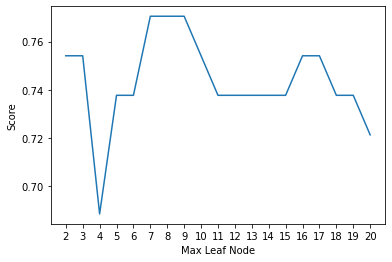

Maximum Max Leaf Node Score is 77.05%
Max Leaf Node with highest score:  6


In [404]:
#to determine optimum number of maximum leaf nodes 
scoreList = []
for i in range(2,21):
    dt2 = DecisionTreeClassifier(max_leaf_nodes = i)  # n_neighbors means k
    dt2.fit(xtrain, ytrain)
    scoreList.append(dt2.score(xtest, ytest))
    
plt.plot(range(2,21), scoreList)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Max Leaf Node")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum Max Leaf Node Score is {:.2f}%".format(acc))
print("Max Leaf Node with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

The optimal number of maximum leaf nodes is calculated using the loop, to determine the best model score with maximum leaf node ranged from 2 to 20. From the plot above, the optimal maximum number of leaf nodes is 6 to 9 with model score of 77.05%. Hence, the maximum leaf node is set to 9 to provide a better accuracy results. 

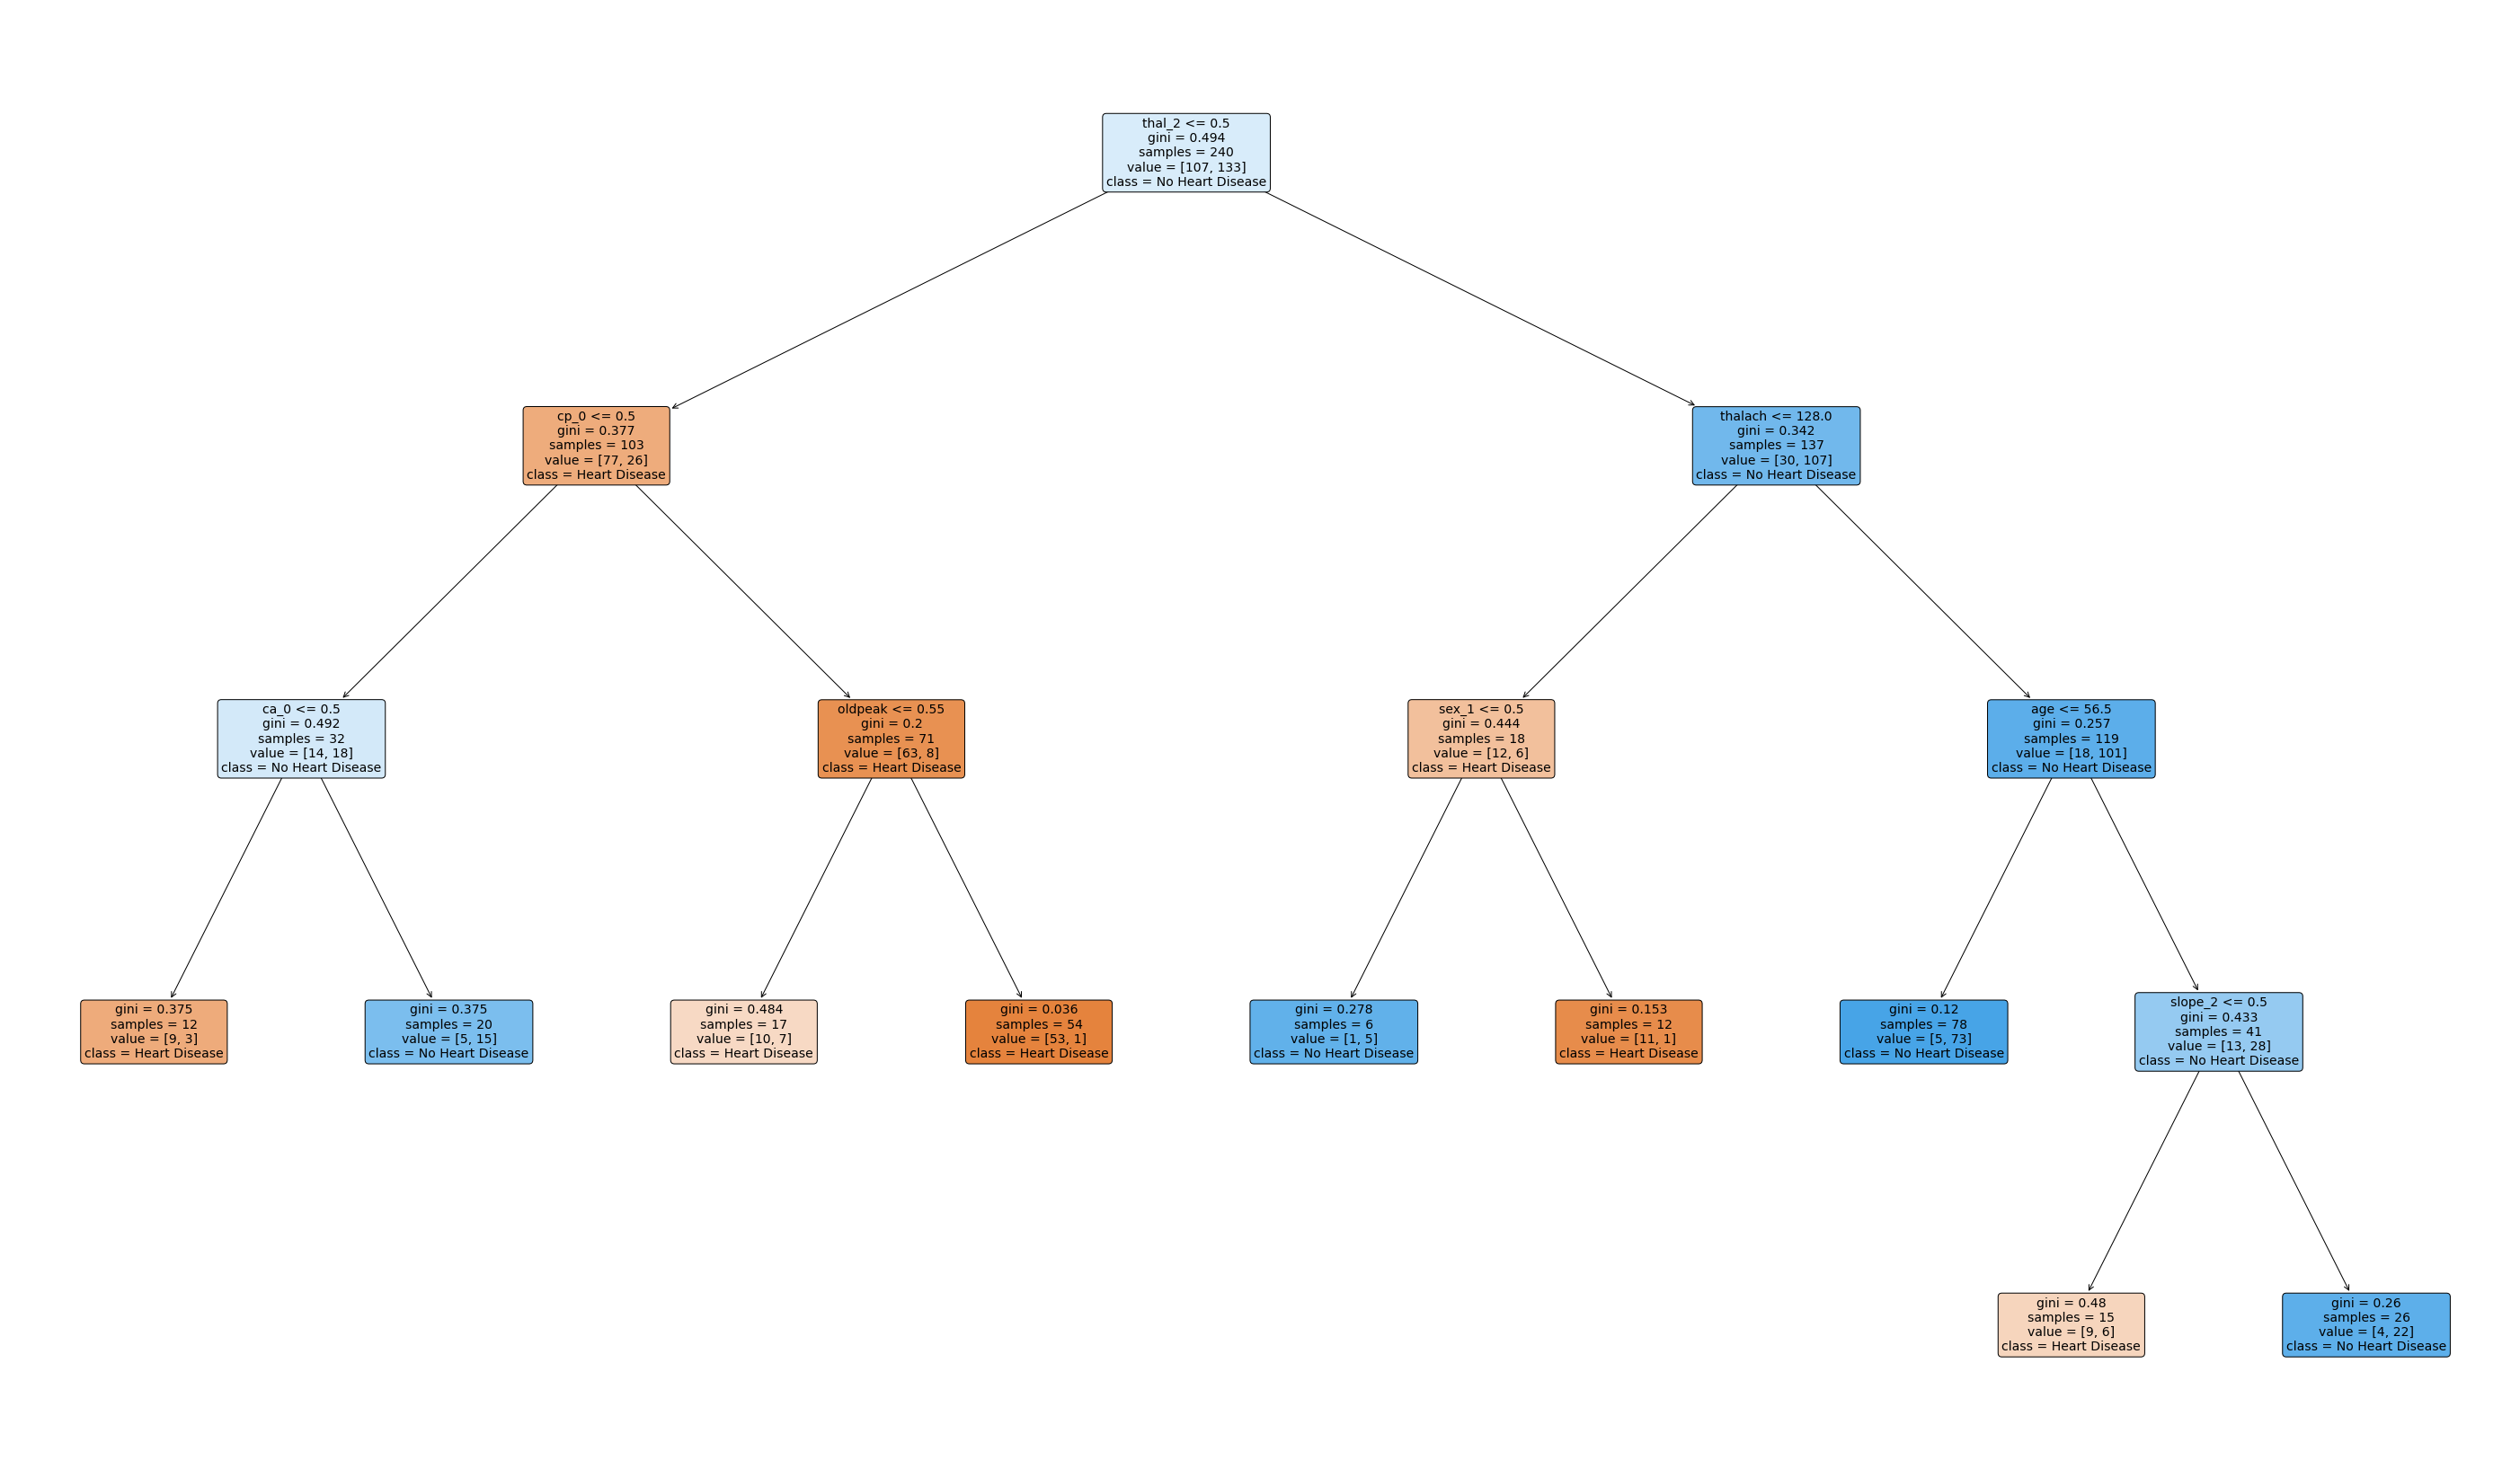

In [421]:
DT = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
#since max leaf node of 6 to 9 has the same scores, thus, 9 is used for better accuracy. 
DT = DT.fit(xtrain,ytrain)
plt.figure(figsize=(50,30))
a = plot_tree(DT, 
              feature_names=list(dataset2.drop(["target"], axis=1)), 
              class_names=["Heart Disease","No Heart Disease"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Naive Bayes Classifier 
Naive Bayes Classifier, the most straightforward and fast classification algorithm, suitable for use in high dimensionality dataset. Naive Bayes Classifier is a collection of classification algorithm based on Bayes Theorem which take likelihood, prior probability and posterior probability of an event into account. 

Naive Bayes Classifier assumes that each predictors are independent from each other, which implies that it requires minimal multicollinearity. As the dataset used in this case study has little to no multicollinearity, hence, Naive Bayes Classifier is suitable for this case study. 

Naive Bayes Classifier also assumes that each predictors contributes equally to the outcome, which implies that they all have the same probability to contribute to the outcome (Khurana, 2020). 

Like Decision Tree Classifier, Naive Bayes Classifier is not affected by monotonic transformation, hence, normalization is not required (Dernoncourt, 2016). 

In [422]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

## Performance Evaluation of K-Nearest Neighbour, Decion Tree and Naive Bayes Classification Model 
Model performance of KNN, Decition Tree and Naive Bayes Classifier is calculated and evaluated using accuracy, F1 score and confusion matrix. This is to determine the best model that best fit this case study of prediction of presence of heart disease. 

There are many ways to evalute the model performance, depending on the model. For classification model, confusion matrix is used; for regression model, methods such as root mean square error (RMSE), mean absolute error (MAE), relative absolute error (RAE) and others are used (Singh, 2019). 

Since the model built in this case study is classification model, thus, confusion matrix is used. 

In [423]:
#validate model by using test set to predict 
dt_pred = DT.predict(xtest)
knn_pred = knn.predict(xtestknn)
nb_pred = nb.predict(xtest)

In [424]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
#knn
print("Accuracy of KNN: ", accuracy_score(ytest, knn_pred) )
print("F1 Score of KNN: ", f1_score(ytest, knn_pred) )
knncm = confusion_matrix(ytest, knn_pred)

Accuracy of KNN:  0.8852459016393442
F1 Score of KNN:  0.8771929824561403


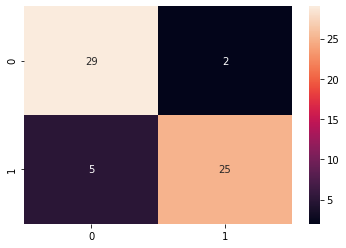

In [425]:
sns.heatmap(knncm, annot=True)

In [426]:
#decision tree
print("Accuracy of Decision Tree: ", accuracy_score(ytest, dt_pred) )
print("F1 Score of Decision Tree: ", f1_score(ytest, dt_pred) )
dtcm = confusion_matrix(ytest, dt_pred)

Accuracy of Decision Tree:  0.7704918032786885
F1 Score of Decision Tree:  0.7741935483870969


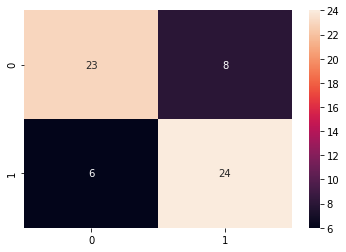

In [427]:
sns.heatmap(dtcm, annot=True)

In [373]:
#nb
print("Accuracy of Naive Bayes: ", accuracy_score(ytest, nb_pred) )
print("F1 Score of Naive Bayes: ", f1_score(ytest, nb_pred) )
nbcm = confusion_matrix(ytest, nb_pred)

Accuracy of Naive Bayes:  0.7704918032786885
F1 Score of Naive Bayes:  0.7741935483870969


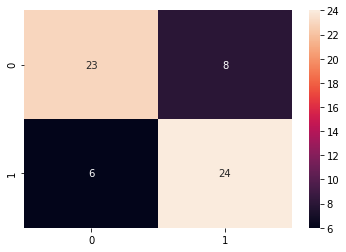

In [374]:
sns.heatmap(nbcm, annot=True)

Accuracy measures how correct the predictions are, precision measures how often the model is correct when predicting the positive class, and recall measures how many actual positives are predicted correctly (Algorithmia, 2020). As accuracy sometimes may be misleading, thus, F1 score is also used to evaluate model performance. F1 score is a harmonic balance between precision and recall, which is commonly used for biased dataset.  

In this case study, the worst case scenario is the False Negatives (FN) which is located in the top right of the confusion matrix. In FN, patients with heart disease is classified as no heart disease, this might cause delay in treatment for the patient due to misdiagnosis and wrong prediction by the model, causing death in serious cases. From the confusion matrix, KNN model has the lowest FN among the other models, hence, KNN is more preferable. 

The accuracy and F1 score of KNN is also higher compared with Decision Tree and Naive Bayes Classifier, with accuracy of 88.5% and F1 score of 87.7%. 

Thus, KNN is chosen to be the model to predict presence of heart disease in this case study. 

## Interpretation of Model  
The KNN model is interpreted by giving an unknown new data for prediction as shown below.

In [453]:
data1 = [[55,140,250,160,2.5, 
        0, 1, 
        0,0,0,1,
        0,1,
        0,0,1,
        0,1,
        0,1,0,
        1,0,0,0,0,
        1,0,0,0]]

DF = pd.DataFrame(data,columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 
                                  'sex_0', 'sex_1', 
                                  'cp_0', 'cp_1', 'cp_2', 'cp_3', 
                                  'fbs_0', 'fbs_1', 
                                  'restecg_0', 'restecg_1', 'restecg_2', 
                                  'exang_0', 'exang_1',
                                  'slope_0', 'slope_1', 'slope_2', 
                                  'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 
                                  'thal_0', 'thal_1', 'thal_2', 'thal_3'])
pred1 = knn.predict(data)
pred1

array([1])

From the KNN model prediction, a male which is 55-years-old with trestbps of 140, chol of 250, thalach of 160, oldpeak of 2.5, with asymptomatic chest pain, with fasting blood sugar of greater than 120mg/dl, resting electrocardiographic showing proabable or definite left ventricular hypertropy by Estes' criteria, with exercise induced angina, with upsloping slope of the peak exercise ST segment, 0 number of major vessels colored by flourosopy and normal thal is predicted to suffer from heart disease. 

The KNN model devolped for this case study is considered performing well with accuracy of 88.5%. This high accuracy model can be used as reference for healthcare instituitions for prediction of presence of heart disease in United States citizens. 

However, the KNN model will perform better if it was trained with a larger dataset with more instances, it will help improve the KNN model's capability to predict unknown data. 

It is also suggested to train the model with dataset from different locations and countries, such as dataset from Asia. As the KNN model in this case study is built using a United States based dataset, the model tends to overfit, which implies that the model is only capable to predict heart disease of United States citizen, but not citizens from other country. This is because different countries has different culture and lifestyle, and different ethnics has different genetic which also contributes to the causes of heart disease, thus, the KNN model developed in this case study is more biased for United States citizens. 

In conclusion, the KNN model best fits the case study to predict if a United States citizens suffers from heart disease or not. It will not only reduce the cost of diagnosis, but also improves the efficiency in diagnosis and treatment, as patients are diagnosed efficiently and early treatment can be given for better recovery. This would help to reduce the mortality rate caused by heart disease. Suggestions mentioned above can be implemented for a better prediction model that will be used not only in United States but also all over the world with high accuracy and precise prediction. 

## References 


Algorithmia. 2020. Evaluating machine learning models with a confusion matrix. [online] Available at: <https://algorithmia.com/blog/evaluating-machine-learning-models-with-a-confusion-matrix> [Accessed 4th December 2020] 

Ash3323, Taylor, J. 2018. Is there any reason to prefer the AIC or BIC over the other?. [online] Available at: <https://stats.stackexchange.com/questions/577/is-there-any-reason-to-prefer-the-aic-or-bic-over-the-other> [Accessed 4th December 2020]

Brownlee, J. 2019. Probabilistic Model Selection with AIC, BIC, and MDL. [online] Available at: <https://machinelearningmastery.com/probabilistic-model-selection-measures/> [Accessed 4th December 2020] 

CDC. n.d. Heart Disease Facts. [online] Available at: <https://www.cdc.gov/heartdisease/facts.htm> [Accessed: 4th December 2020]

CK-12. 2020. 11.9 Measures of Central Tendency and Dispersion. [online] Available at: <https://www.ck12.org/book/ck-12-basic-algebra-concepts/section/11.9/> [Accessed 4th December 2020] 

Dernoncourt, F. 2016. With the Naive Bayes classifier, why do we have to normalize the probabilities after calculating the probabilities of each hypothesis?. [online] Available at: <https://stats.stackexchange.com/questions/249762/with-the-naive-bayes-classifier-why-do-we-have-to-normalize-the-probabilities-a> [Accesse 4th December 2020] 

GeeksforGeeks. 2019. Data Preprocessing in Data Mining. [online] Available at: <https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/> [Accessed 4th December 2020]

JornalDev. n.d. Seaborn Kdeplot – A Comprehensive Guide. [online] Available at: <https://www.journaldev.com/40204/seaborn-kdeplot> [Accessed 4th December 2020] 

Kaufmann, J. 2014. What do you consider a good standard deviation?. [online] Available at: <https://www.researchgate.net/post/What-do-you-consider-a-good-standard-deviation> [Accessed 4th December 2020] 

Kedarps. 2017. Why do you need to scale data in KNN. [online] Available at: <https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn> [Accessed 4th December 2020]

Khurana, S. 2020. Naive Bayes Classifiers. [online] Available at: <https://www.geeksforgeeks.org/naive-bayes-classifiers/> [Accessed 4th December 2020] 

Kumar, A. 2020. What, When, and How of Scatterplot Matrix in Python - Data Analytics. [online] Available at: <https://dzone.com/articles/what-when-amp-how-of-scatterplot-matrix-in-python> [Accessed 4th December 2020] 

McNeese, B. 2016. Are the Skewness and Kurtosis Useful Statistics?. [online] Available at: <https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics> [Accessed 4th December 2020] 

Navlani, A. 2018. KNN Classification using Scikit-learn. Available at: <https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9066765&gclid=Cj0KCQiA2af-BRDzARIsAIVQUOchHjPNlt2tMCGQWrunwsDqPRMJEiQyZ5UXcATkf8I2QPQjl1Q2IcQaAsvCEALw_wcB> [Accessed 4th December 2020]

Navlani, A. 2018. Decision Tree Classification in Python. Available at: <https://www.datacamp.com/community/tutorials/decision-tree-classification-python> [Accessed 4th December 2020] 

Rapaio. 2015. Do you have to normalize data when building decision trees using R?. Available at: <https://datascience.stackexchange.com/questions/5277/do-you-have-to-normalize-data-when-building-decision-trees-using-r> [Accessed 4th December 2020] 

Rawat, S. 2019. Heart Disease Prediction. [online] Available at: <https://towardsdatascience.com/heart-disease-prediction-73468d630cfc> [Accessed 4th December 2020]

Singh, D. 2019. What is Predictive Model Performance Evaluation. [online] Available at: <https://medium.com/@divyacyclitics15/what-is-predictive-model-performance-evaluation-8ef117ae0e40> [Accessed 5th November 2020]

Stephanie. 2017. Weibull Distribution and Weibull Analysis. [online] Available at: <https://www.statisticshowto.com/weibull-distribution/> [Accessed 4th December 2020] 

UCI Machine Learning Repository. n.d. Heart Disease Data Set. [online] Available at: <https://archive.ics.uci.edu/ml/datasets/heart+disease> [Accessed 4th December 2020] 

Weibull. n.d. Characteristics of the Weibull Distribution. [online] Available at: <https://www.weibull.com/hotwire/issue14/relbasics14.htm> [Accessed 4th December 2020] 

Whitworth, G. 2020. Everything You Need To Know About Heart Disease. [online] Available at: <https://www.healthline.com/health/heart-disease> [Accessed 4th December 2020] 

